In [266]:
#pip install spotipy

In [267]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
from datetime import datetime

## Authorization Code Flow and get all the User's Liked Songs or Current User Saved Tracks

In [268]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

cid = <Hidden: Use Your Own>
secret = <Hidden: Use Your Own>
scope = "user-library-read"
uri = <Hidden: Use Your Own>

all_liked_songs = []
all_artists = []
song_release_date = []
Song_id = []
song_popularity = []
artist_id = []
song_saved_date = []


sp = spotipy.Spotify(auth_manager= SpotifyOAuth(cid, secret, redirect_uri = uri, scope=scope))
for i in range(0,3000,50):
    results = sp.current_user_saved_tracks(limit = 50, offset = i)
    for idx, item in enumerate(results['items']):
        song_saved_date.append(item['added_at'])
        track = item['track']
        all_artists.append(track['artists'][0]['name'])
        all_liked_songs.append(track['name'])
        song_release_date.append(track['album']['release_date'])
        Song_id.append(track['id'])
        song_popularity.append(track['popularity'])
        artist_id.append(track['artists'][0]['id'])


        



        

In [269]:
print(f"Total number of Liked Songs: {len(all_liked_songs)}")

Total number of Liked Songs: 2709


In [270]:
track.keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

## Creating a Dataframe with 
-  Liked Songs
-  Song_id
-  Song_Popularity
-  Artists
-  Artist_id
-  Release Date
-  Song Saved Date (Song Saved as a Liked Song)

In [271]:
data = {'Song_Saved_Date': song_saved_date, 'Songs': all_liked_songs, 'Song_id': Song_id, 'Song_popularity': song_popularity, 'Artists': all_artists, 'Artist_id': artist_id, 'Release_Date': song_release_date}
df = pd.DataFrame(data)

In [272]:
df

,Song_Saved_Date,Songs,Song_id,Song_popularity,Artists,Artist_id,Release_Date
0,2025-08-16T19:35:01Z,Forgive You,1sfTdlWfcFdI7NfmcfZPii,51,Leon Bridges,3qnGvpP8Yth1AqSBMqON5x,2018-05-04
1,2025-08-16T19:31:48Z,Beyond,1Omt5bfz1tZUCqd26HxbS0,74,Leon Bridges,3qnGvpP8Yth1AqSBMqON5x,2018-05-04
2,2025-08-16T14:25:08Z,Down the Line,1K3T9htc31JwKiZOd1zC5a,29,Eric Gabriel,0Mpu2CWzVWzHsKiVt9nPVx,2025-03-21
3,2025-08-14T06:03:19Z,Sita Ram,73ouTW48uzkEEZV1vyJC0I,33,Krishna Das,7BIXafmacnax46P30TEzNz,2005-10-04
4,2025-08-13T05:40:39Z,Iris,4zQNPpLlINdDj3gOkBBRuK,54,Chuck Adams,6GLO5F72p0eTCcumR6Ac5a,2025-06-27
...,...,...,...,...,...,...,...
2704,2020-04-23T16:26:31Z,Intro,0bXpmJyHHYPk6QBFj25bYF,6,The xx,3iOvXCl6edW5Um0fXEBRXy,2009-08-16
2705,2020-04-20T10:12:44Z,Dance Monkey (8D Audio),4KgAFt6Tt4E96poxgq5dVJ,12,8D Tunes,5fOzKeaM5PmZ2BcKKAtFeq,2020-01-24
2706,2020-04-19T11:20:16Z,Don't Start Now,6WrI0LAC5M1Rw2MnX2ZvEg,74,Dua Lipa,6M2wZ9GZgrQXHCFfjv46we,2019-10-31
2707,2020-04-19T11:15:11Z,Hotel California (Cover),5nS9WEWYnbQDBAe81SHhDP,48,Passenger,0gadJ2b9A4SKsB1RFkBb66,2017-07-02


In [273]:
df.shape

(2709, 7)

In [274]:
df['Song_Saved_Date'].dtype

dtype('O')

In [275]:
df['Song_Saved_Date'] = pd.to_datetime(df['Song_Saved_Date'])
df['Song_Saved_Date'] = df['Song_Saved_Date'].dt.strftime('%Y-%m-%d')

In [276]:
df

,Song_Saved_Date,Songs,Song_id,Song_popularity,Artists,Artist_id,Release_Date
0,2025-08-16,Forgive You,1sfTdlWfcFdI7NfmcfZPii,51,Leon Bridges,3qnGvpP8Yth1AqSBMqON5x,2018-05-04
1,2025-08-16,Beyond,1Omt5bfz1tZUCqd26HxbS0,74,Leon Bridges,3qnGvpP8Yth1AqSBMqON5x,2018-05-04
2,2025-08-16,Down the Line,1K3T9htc31JwKiZOd1zC5a,29,Eric Gabriel,0Mpu2CWzVWzHsKiVt9nPVx,2025-03-21
3,2025-08-14,Sita Ram,73ouTW48uzkEEZV1vyJC0I,33,Krishna Das,7BIXafmacnax46P30TEzNz,2005-10-04
4,2025-08-13,Iris,4zQNPpLlINdDj3gOkBBRuK,54,Chuck Adams,6GLO5F72p0eTCcumR6Ac5a,2025-06-27
...,...,...,...,...,...,...,...
2704,2020-04-23,Intro,0bXpmJyHHYPk6QBFj25bYF,6,The xx,3iOvXCl6edW5Um0fXEBRXy,2009-08-16
2705,2020-04-20,Dance Monkey (8D Audio),4KgAFt6Tt4E96poxgq5dVJ,12,8D Tunes,5fOzKeaM5PmZ2BcKKAtFeq,2020-01-24
2706,2020-04-19,Don't Start Now,6WrI0LAC5M1Rw2MnX2ZvEg,74,Dua Lipa,6M2wZ9GZgrQXHCFfjv46we,2019-10-31
2707,2020-04-19,Hotel California (Cover),5nS9WEWYnbQDBAe81SHhDP,48,Passenger,0gadJ2b9A4SKsB1RFkBb66,2017-07-02


## There are 15 Rows in my dataframe where Release Date is 0000 and Song, Artists column is blank

In [277]:
redundant = df[df['Release_Date'] == df['Release_Date'].min()]

In [278]:
redundant

,Song_Saved_Date,Songs,Song_id,Song_popularity,Artists,Artist_id,Release_Date
1733,2023-03-15,,30CDYWqqitNHUa0DGaUeIE,0,,0LyfQWJT6nXafLPZqxe9Of,0000
1738,2023-03-13,,2XfmRXh6SsEk22Hz8zahl3,0,,0LyfQWJT6nXafLPZqxe9Of,0000
1824,2023-02-22,,4nYjleYorTT5Iux4PHSli7,0,,0LyfQWJT6nXafLPZqxe9Of,0000
2026,2022-12-26,,4X2WrYnL1taXJZh5gF5HCJ,0,,0LyfQWJT6nXafLPZqxe9Of,0000
2027,2022-12-26,,4WuAgJoFrXmC4oKzGJYFC6,0,,0LyfQWJT6nXafLPZqxe9Of,0000
2075,2022-11-28,,0KRSjRi3cEKMuFhAXKyd7d,0,,0LyfQWJT6nXafLPZqxe9Of,0000
2318,2022-05-13,,6Y1cH3RzDCMWGQtOS0HmP8,0,,0LyfQWJT6nXafLPZqxe9Of,0000
2334,2022-05-07,,5WzfGg2ueNoOS5aIkaR9qX,0,,0LyfQWJT6nXafLPZqxe9Of,0000
2370,2022-04-28,,0kVbVeq2usF0a1zN9weRnL,0,,0LyfQWJT6nXafLPZqxe9Of,0000
2402,2022-04-10,,3PAC15iDIHk7IWD8ShSgWh,0,,0LyfQWJT6nXafLPZqxe9Of,0000


In [279]:
redundant.shape

(15, 7)

In [280]:
redundant.index

Index([1733, 1738, 1824, 2026, 2027, 2075, 2318, 2334, 2370, 2402, 2519, 2596,
       2597, 2603, 2609],
      dtype='int64')

### These rows are of now use so I will drop these rows using their indexes

In [281]:
df.drop(df[df['Release_Date'] == df['Release_Date'].min()].index, inplace = True)

In [282]:
df #Removed 15 rows

,Song_Saved_Date,Songs,Song_id,Song_popularity,Artists,Artist_id,Release_Date
0,2025-08-16,Forgive You,1sfTdlWfcFdI7NfmcfZPii,51,Leon Bridges,3qnGvpP8Yth1AqSBMqON5x,2018-05-04
1,2025-08-16,Beyond,1Omt5bfz1tZUCqd26HxbS0,74,Leon Bridges,3qnGvpP8Yth1AqSBMqON5x,2018-05-04
2,2025-08-16,Down the Line,1K3T9htc31JwKiZOd1zC5a,29,Eric Gabriel,0Mpu2CWzVWzHsKiVt9nPVx,2025-03-21
3,2025-08-14,Sita Ram,73ouTW48uzkEEZV1vyJC0I,33,Krishna Das,7BIXafmacnax46P30TEzNz,2005-10-04
4,2025-08-13,Iris,4zQNPpLlINdDj3gOkBBRuK,54,Chuck Adams,6GLO5F72p0eTCcumR6Ac5a,2025-06-27
...,...,...,...,...,...,...,...
2704,2020-04-23,Intro,0bXpmJyHHYPk6QBFj25bYF,6,The xx,3iOvXCl6edW5Um0fXEBRXy,2009-08-16
2705,2020-04-20,Dance Monkey (8D Audio),4KgAFt6Tt4E96poxgq5dVJ,12,8D Tunes,5fOzKeaM5PmZ2BcKKAtFeq,2020-01-24
2706,2020-04-19,Don't Start Now,6WrI0LAC5M1Rw2MnX2ZvEg,74,Dua Lipa,6M2wZ9GZgrQXHCFfjv46we,2019-10-31
2707,2020-04-19,Hotel California (Cover),5nS9WEWYnbQDBAe81SHhDP,48,Passenger,0gadJ2b9A4SKsB1RFkBb66,2017-07-02


In [283]:
df['Release_Date'].dtypes

dtype('O')

In [284]:
df['Release_Date']

0       2018-05-04
1       2018-05-04
2       2025-03-21
3       2005-10-04
4       2025-06-27
           ...    
2704    2009-08-16
2705    2020-01-24
2706    2019-10-31
2707    2017-07-02
2708    2017-06-05
Name: Release_Date, Length: 2694, dtype: object

In [285]:
Year_of_Release_Date = []
def extracting_year(date):
    for yr in date:
        Year_of_Release_Date.append(yr[:4])
    df['Year_of_Release_Date'] = Year_of_Release_Date 
extracting_year(df['Release_Date'])

In [286]:
df

,Song_Saved_Date,Songs,Song_id,Song_popularity,Artists,Artist_id,Release_Date,Year_of_Release_Date
0,2025-08-16,Forgive You,1sfTdlWfcFdI7NfmcfZPii,51,Leon Bridges,3qnGvpP8Yth1AqSBMqON5x,2018-05-04,2018
1,2025-08-16,Beyond,1Omt5bfz1tZUCqd26HxbS0,74,Leon Bridges,3qnGvpP8Yth1AqSBMqON5x,2018-05-04,2018
2,2025-08-16,Down the Line,1K3T9htc31JwKiZOd1zC5a,29,Eric Gabriel,0Mpu2CWzVWzHsKiVt9nPVx,2025-03-21,2025
3,2025-08-14,Sita Ram,73ouTW48uzkEEZV1vyJC0I,33,Krishna Das,7BIXafmacnax46P30TEzNz,2005-10-04,2005
4,2025-08-13,Iris,4zQNPpLlINdDj3gOkBBRuK,54,Chuck Adams,6GLO5F72p0eTCcumR6Ac5a,2025-06-27,2025
...,...,...,...,...,...,...,...,...
2704,2020-04-23,Intro,0bXpmJyHHYPk6QBFj25bYF,6,The xx,3iOvXCl6edW5Um0fXEBRXy,2009-08-16,2009
2705,2020-04-20,Dance Monkey (8D Audio),4KgAFt6Tt4E96poxgq5dVJ,12,8D Tunes,5fOzKeaM5PmZ2BcKKAtFeq,2020-01-24,2020
2706,2020-04-19,Don't Start Now,6WrI0LAC5M1Rw2MnX2ZvEg,74,Dua Lipa,6M2wZ9GZgrQXHCFfjv46we,2019-10-31,2019
2707,2020-04-19,Hotel California (Cover),5nS9WEWYnbQDBAe81SHhDP,48,Passenger,0gadJ2b9A4SKsB1RFkBb66,2017-07-02,2017


In [287]:
df['Release_Date'].dtypes

dtype('O')

### 1) Group by Artists and their Count of Songs

In [288]:
Artists_Songs = df.groupby('Artists')['Songs'].count().sort_values(ascending = False)
Artists_Songs

Artists
Deborah de Luca       57
Pritam                38
Kishore Kumar         29
Lane 8                28
Post Malone           26
                      ..
Karan Kanchan          1
Kardinal Offishall     1
Karthik Rao            1
Katashi Kaitō          1
Σtella                 1
Name: Songs, Length: 1155, dtype: int64

In [289]:
Artist_Songs_Count = df.groupby('Artists').agg({'Songs': 'count'}).rename(columns={'Songs':'Song_Count'}).round(2)
Artist_Songs_Count = Artist_Songs_Count.sort_values(ascending = False, by = 'Song_Count').reset_index()

In [290]:
Artist_Songs_Count.head(15)

,Artists,Song_Count
0,Deborah de Luca,57
1,Pritam,38
2,Kishore Kumar,29
3,Lane 8,28
4,Post Malone,26
5,Shankar-Ehsaan-Loy,24
6,Charlotte de Witte,23
7,Worakls,22
8,Udit Narayan,22
9,Fleetwood Mac,21


### Finding the songs before year 2000

In [291]:
df['Year_of_Release_Date'] = df['Year_of_Release_Date'].astype(int) #Changing the datatype to Integer from String

In [292]:
Songs_prior_2000 = df[df['Year_of_Release_Date'] < 2000] #Songs before 2000

In [293]:
Songs_prior_2000

,Song_Saved_Date,Songs,Song_id,Song_popularity,Artists,Artist_id,Release_Date,Year_of_Release_Date
5,2025-08-13,Iris,6Qyc6fS4DsZjB2mRW9DsQs,92,The Goo Goo Dolls,2sil8z5kiy4r76CRTXxBCA,1998,1998
7,2025-08-13,Bahon Mein Chale Aao,7yEzG4Rsbj2xAJr9v8olsI,29,Lata Mangeshkar,61JrslREXq98hurYL2hYoc,1973-05-18,1973
21,2025-08-09,Someday Never Comes,5YgaxBGE09BdrdpEwkvpx2,59,Creedence Clearwater Revival,3IYUhFvPQItj6xySrBmZkd,1972-04-11,1972
22,2025-08-09,Tearin' Up The Country,1uQh2jFwoKT1X1QFf1A5F8,44,Creedence Clearwater Revival,3IYUhFvPQItj6xySrBmZkd,1972-04-11,1972
26,2025-08-06,It Ain't Me Babe,5nbNWAfT1S6V1vqj3snHxS,58,Bob Dylan,74ASZWbe4lXaubB36ztrGX,1964-08-08,1964
...,...,...,...,...,...,...,...,...
2629,2021-06-05,Going Home - Edit,7klcN1Hjle0xBe2KQsYGxY,50,Kenny G,6I3M904Y9IwgDjrQ9pANiB,1997-11-08,1997
2630,2021-06-04,How Could an Angel Break My Heart (with Toni B...,4ViVDWlmKfGff25okNzGcC,55,Kenny G,6I3M904Y9IwgDjrQ9pANiB,1997-11-08,1997
2644,2021-05-26,Ambe Tu Hai Jagdambe Kaali,4AkCKZnRkALSCl8zerB1k4,46,Narendra Chanchal,6cxJR2PoA84Mlsr9yGrSsZ,1996-09-01,1996
2645,2021-05-26,Sankatmochan Hanuman Ashtak,3ZF9iTthw2m6w8MsNC0daD,65,Hariharan,2NoJ7NuNs9nyj8Thoh1kbu,1992-01-01,1992


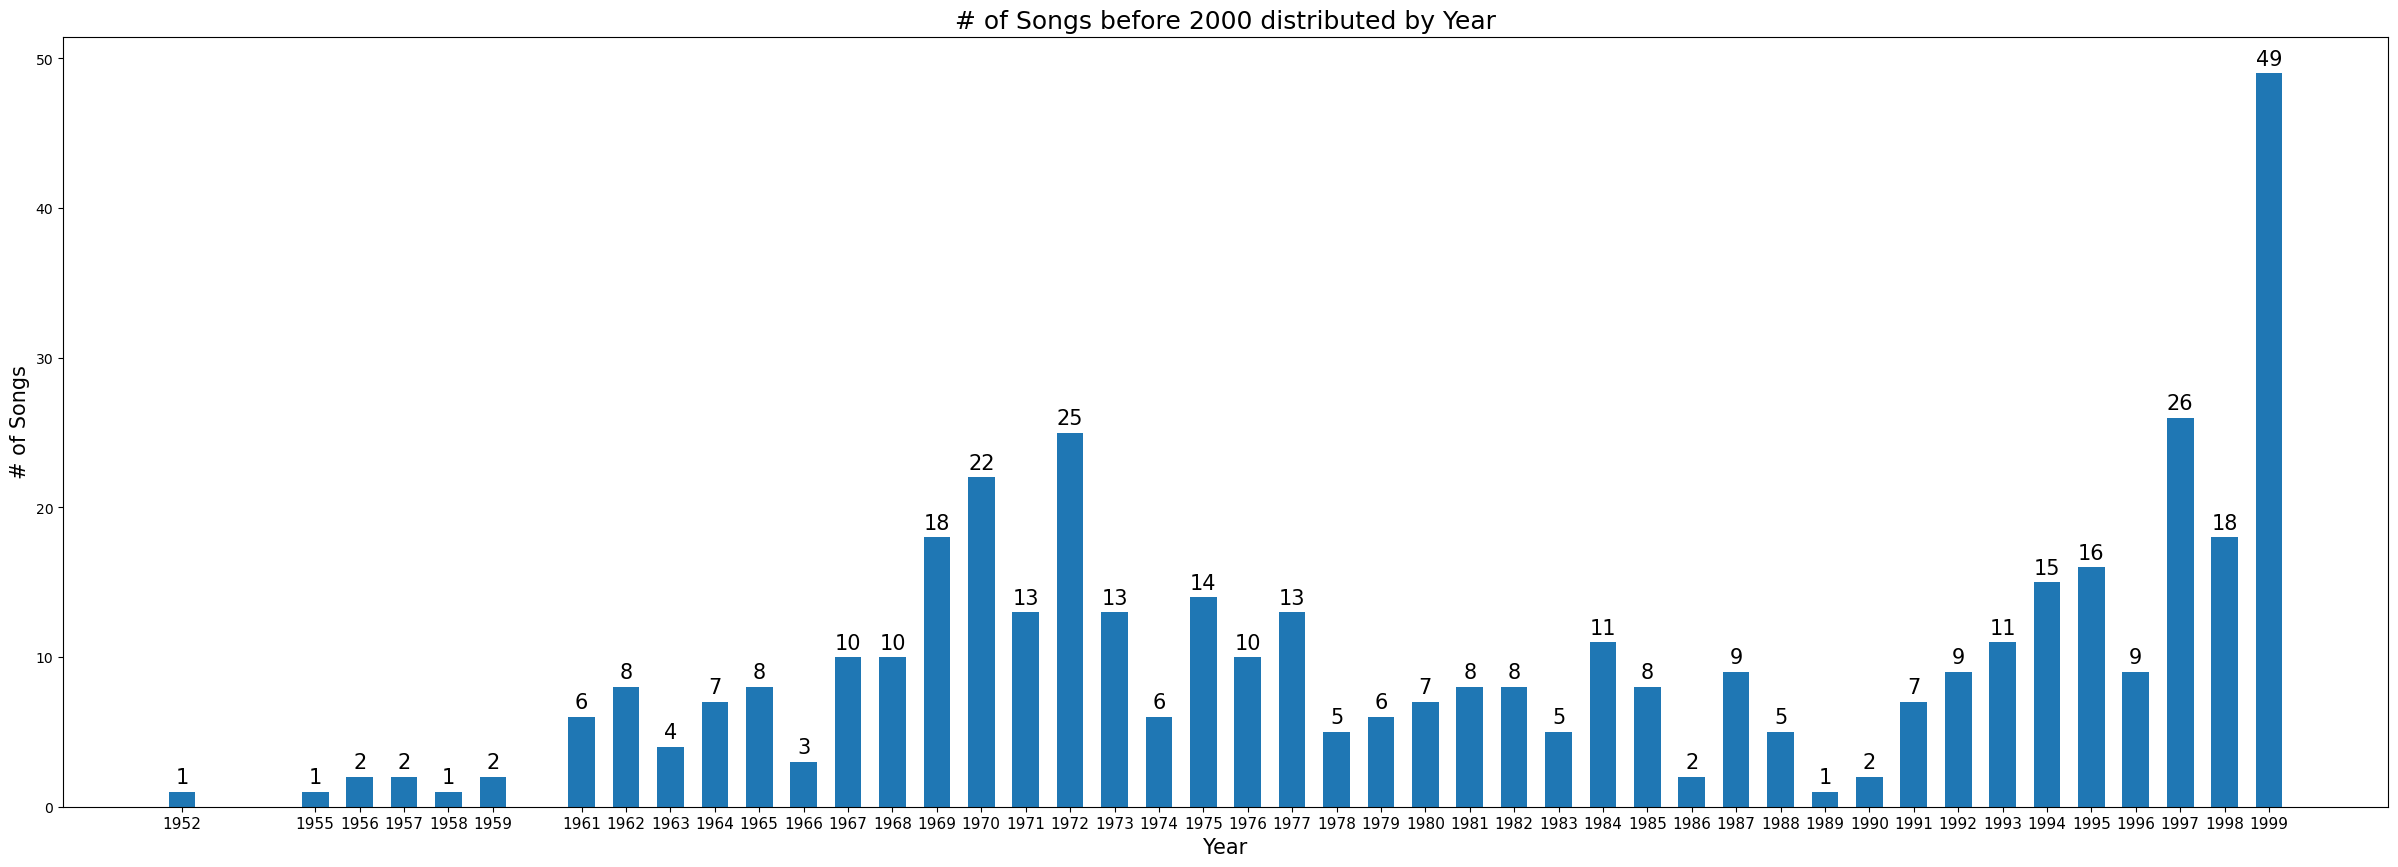

In [294]:
year_list = list(sorted(Songs_prior_2000['Year_of_Release_Date'].unique()))
Song_count = list(Songs_prior_2000.groupby('Year_of_Release_Date')['Songs'].count().sort_index(ascending = True))

plt.figure(figsize=(30,10))
bars = plt.bar(year_list, Song_count,width=0.6)
plt.bar_label(bars,padding=3, color='black', fontsize= 15)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('# of Songs',fontsize= 15)
plt.title('# of Songs before 2000 distributed by Year', fontsize= 18)
plt.xticks(year_list,fontsize= 11)
plt.show()

### Oldest and the Most recet Song in my Liked Song

In [295]:
df[df['Release_Date'] == df['Release_Date'].min()] #Oldest

,Song_Saved_Date,Songs,Song_id,Song_popularity,Artists,Artist_id,Release_Date,Year_of_Release_Date
1428,2023-11-06,La vie en rose - Single Version,0zDVclPMSsjeyvbnqhWOmt,70,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,1952-04-01,1952


In [296]:
df[df['Release_Date'] == df['Release_Date'].max()] #Most Recent

,Song_Saved_Date,Songs,Song_id,Song_popularity,Artists,Artist_id,Release_Date,Year_of_Release_Date
35,2025-07-30,Thodi Si Daaru,3JiLQJmVW7d4O8AQDFB3oj,80,AP Dhillon,6LEG9Ld1aLImEFEVHdWNSB,2025-07-17,2025
42,2025-07-21,Free,5jkzcYe3UjM7VyrlZyiXax,54,Christian Löffler,3tSvlEzeDnVbQJBTkIA6nO,2025-07-17,2025


#### Divide the Year into buckets and do the analysis

In [297]:
df['Year_Bins'] = pd.cut(df['Year_of_Release_Date'], bins = [1952, 1976, 1999, 2010, 2019, 2025], labels = ["1952 to 1976", "1977 to 1999", "2000 to 2010", "2011 to 2019", "2020 to 2025"], include_lowest = True,right=True )

In [298]:
df['Year_Bins'].unique()

['2011 to 2019', '2020 to 2025', '2000 to 2010', '1977 to 1999', '1952 to 1976']
Categories (5, object): ['1952 to 1976' < '1977 to 1999' < '2000 to 2010' < '2011 to 2019' < '2020 to 2025']

In [299]:
df['Year_Bins'].value_counts()

Year_Bins
2020 to 2025    994
2011 to 2019    807
2000 to 2010    457
1977 to 1999    250
1952 to 1976    186
Name: count, dtype: int64

## Number of Songs from different Era

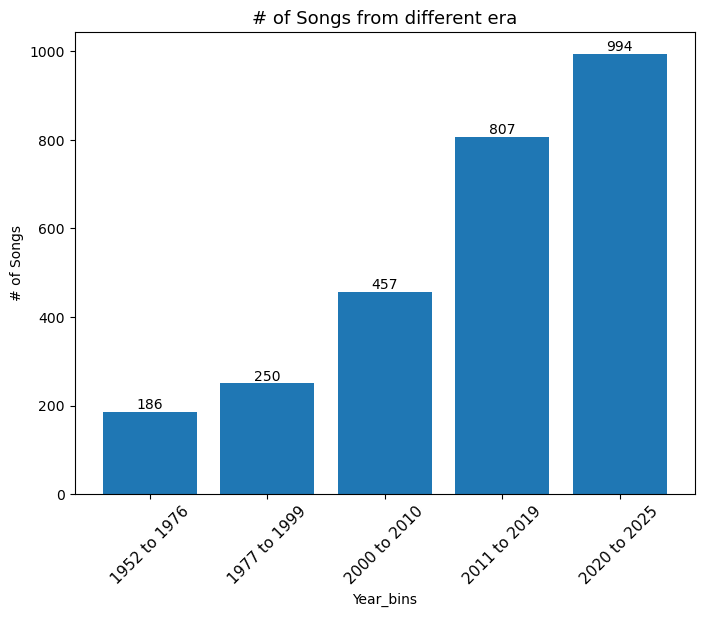

In [300]:
desired_order = ['1952 to 1976', '1977 to 1999', '2000 to 2010', '2011 to 2019', '2020 to 2025']
df['Year_Bins'] = pd.Categorical(df['Year_Bins'], categories= desired_order, ordered=True)
y = df['Year_Bins'].value_counts().reindex(desired_order)
x = y.index
plt.figure(figsize=(8, 6))
bars  = plt.bar(x,y)
plt.bar_label(bars, color='black', fontsize= 10)
plt.xlabel('Year_bins',fontsize= 10)
plt.ylabel('# of Songs',fontsize= 10)
plt.title('# of Songs from different era', fontsize= 13)
plt.xticks(rotation=45,fontsize= 11)
plt.show()

In [301]:
y = df['Year_Bins'].value_counts().reindex(desired_order)
y

Year_Bins
1952 to 1976    186
1977 to 1999    250
2000 to 2010    457
2011 to 2019    807
2020 to 2025    994
Name: count, dtype: int64

In [302]:
x = y.index
x

Index(['1952 to 1976', '1977 to 1999', '2000 to 2010', '2011 to 2019',
       '2020 to 2025'],
      dtype='object', name='Year_Bins')

#### Songs from 1952 to 1976 

In [303]:
print(f"Total number of Liked Songs between 1952 and 1976: {df[df['Year_Bins'] == '1952 to 1976'].shape[0]}")

Total number of Liked Songs between 1952 and 1976: 186


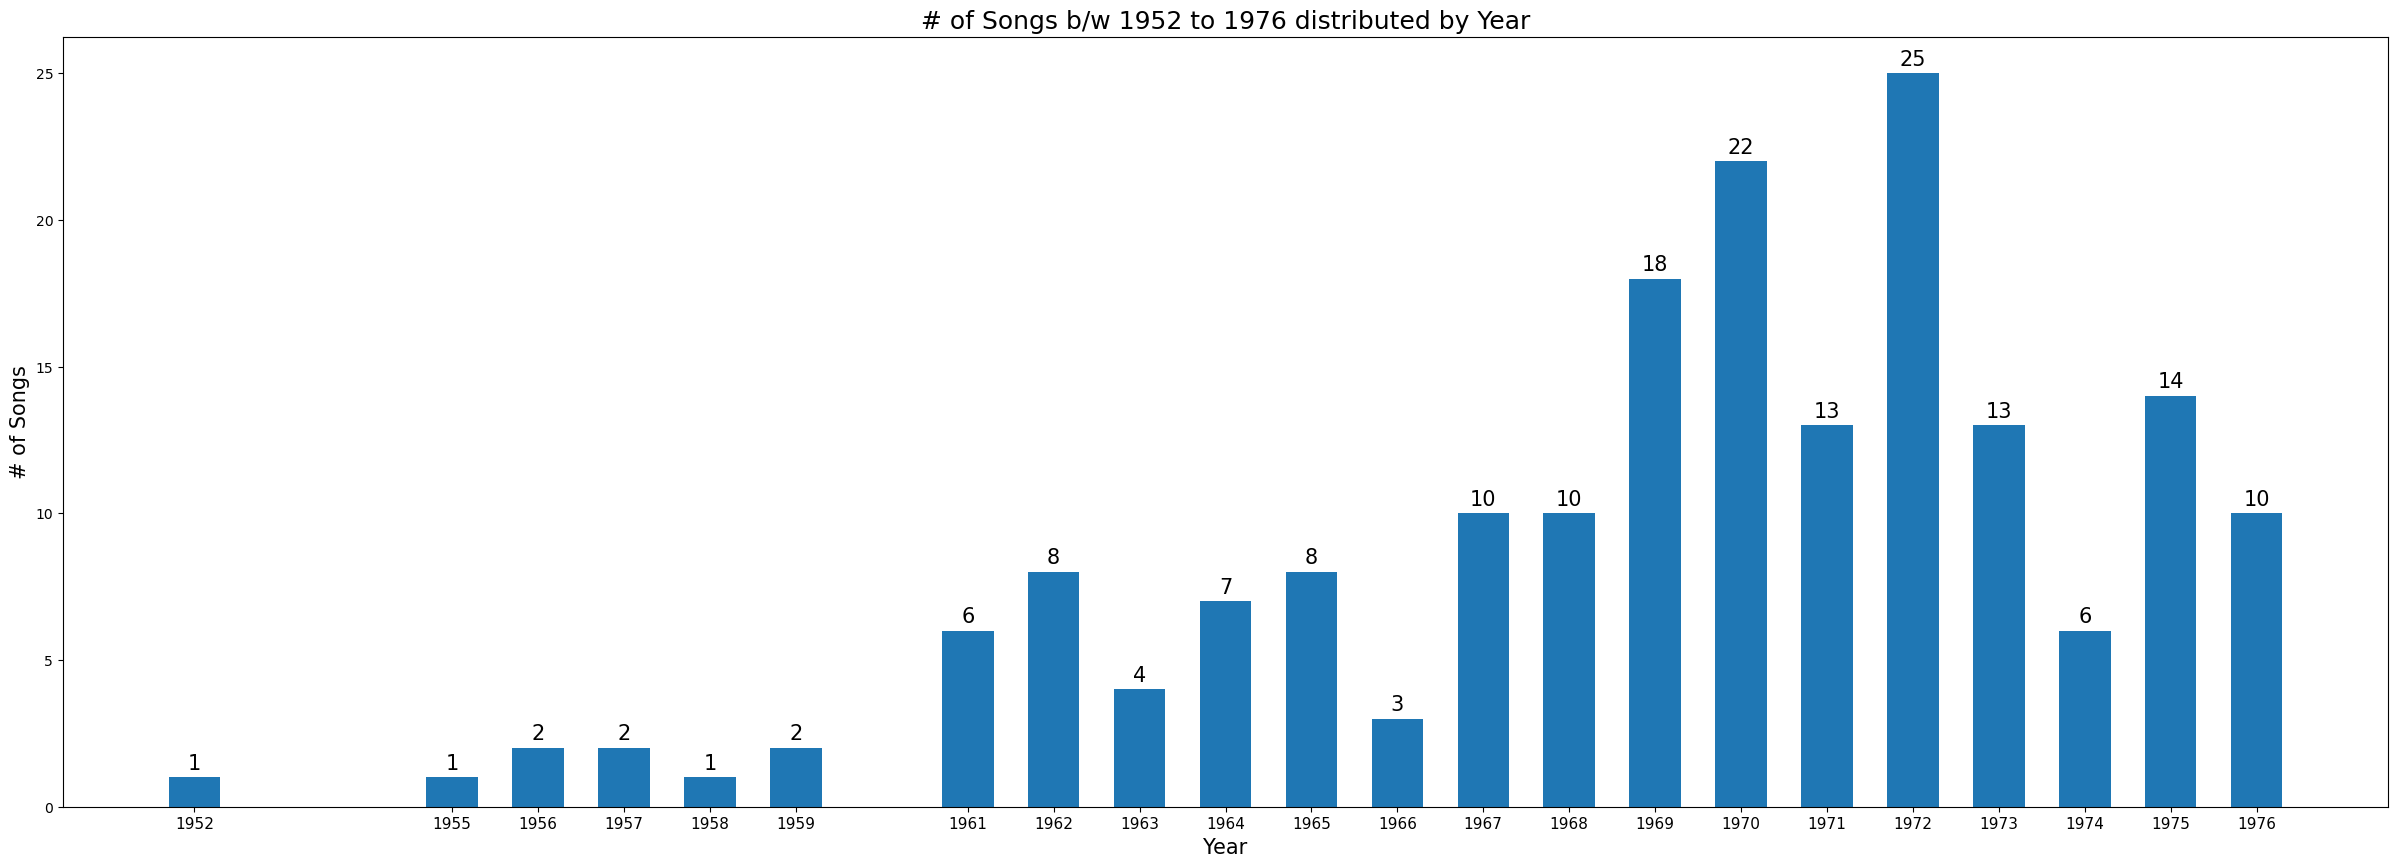

In [304]:
year_list = list(sorted(df[df['Year_Bins'] == '1952 to 1976']['Year_of_Release_Date'].unique()))
Song_count = list(df[df['Year_Bins'] == '1952 to 1976'].groupby('Year_of_Release_Date')['Songs'].count().sort_index(ascending = True))

plt.figure(figsize=(30,10))
bars = plt.bar(year_list, Song_count,width=0.6)
plt.bar_label(bars,padding=3, color='black', fontsize= 15)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('# of Songs',fontsize= 15)
plt.title('# of Songs b/w 1952 to 1976 distributed by Year',fontsize= 18)
plt.xticks(year_list,fontsize= 11)
plt.show()

#### Songs from 1977 to 1999 

In [305]:
print(f"Total number of Liked Songs between 1977 and 1999: {df[df['Year_Bins'] == '1977 to 1999'].shape[0]}")

Total number of Liked Songs between 1977 and 1999: 250


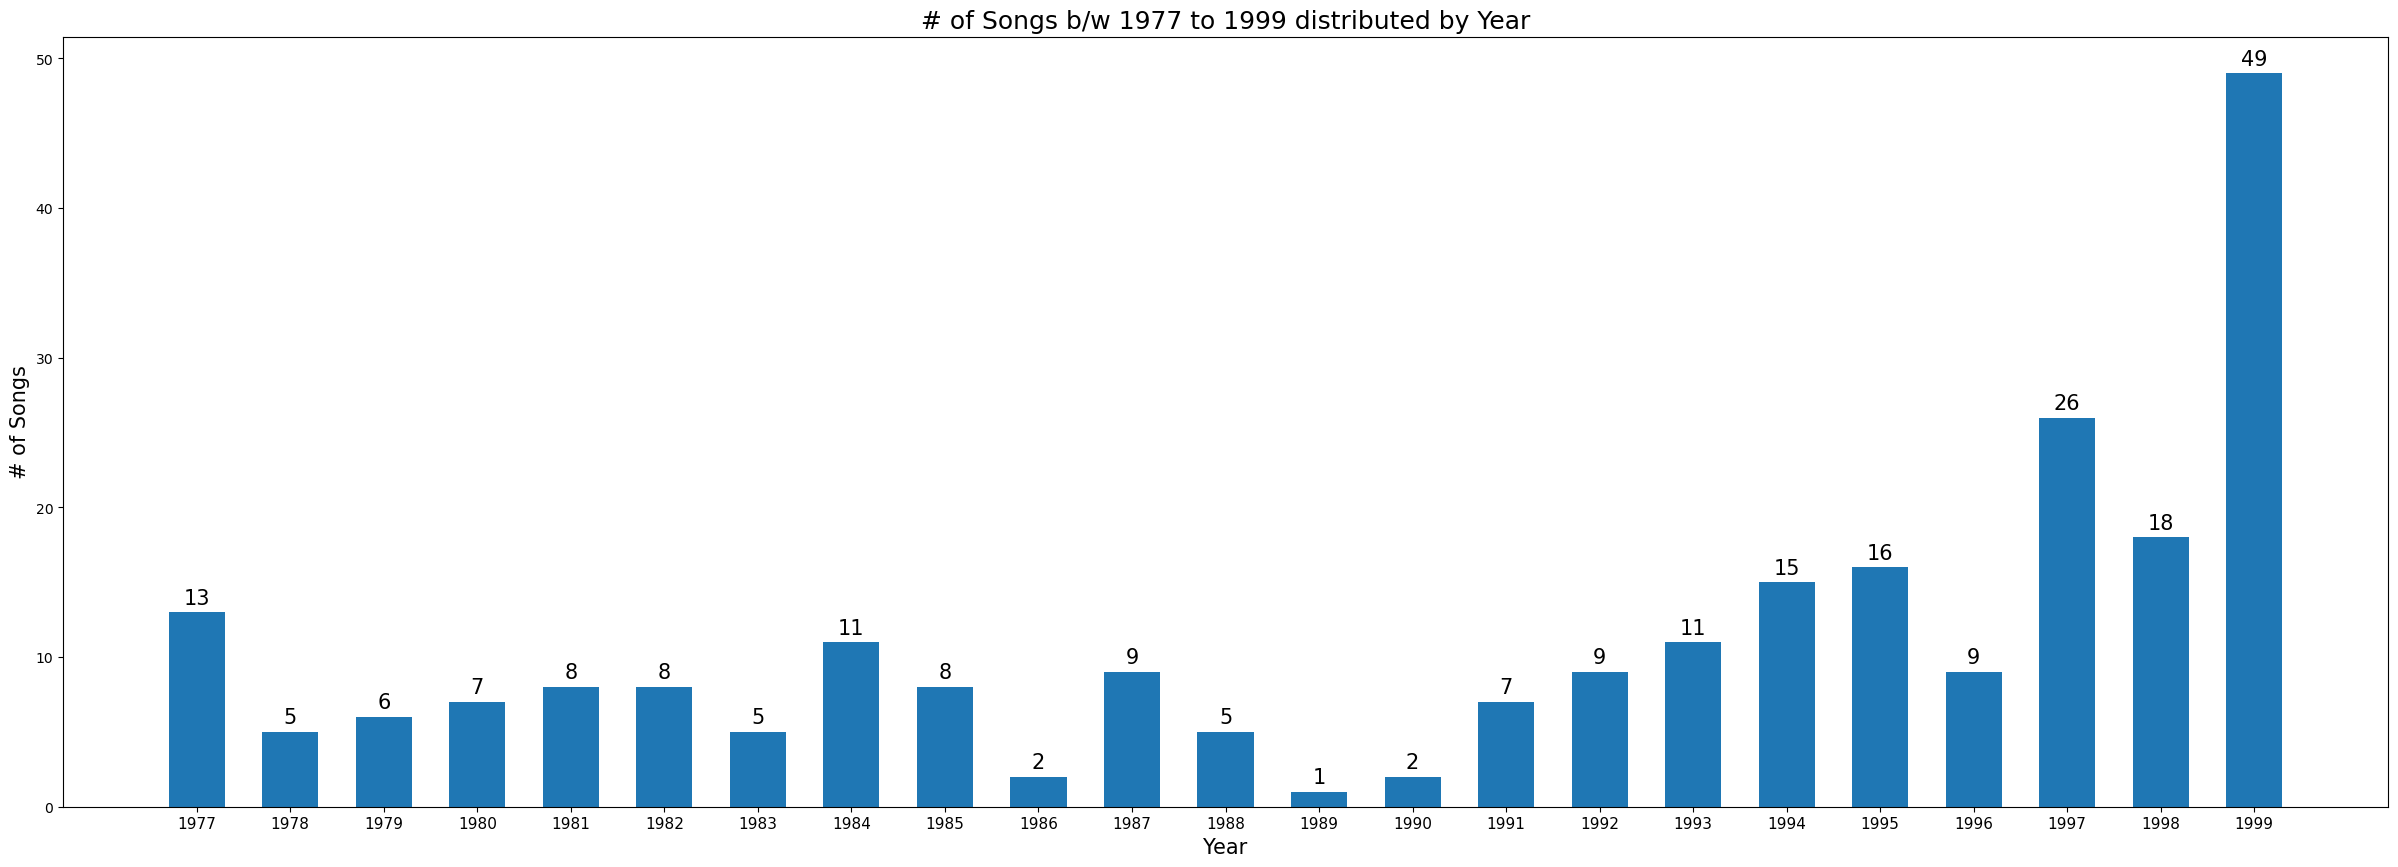

In [306]:
year_list = list(sorted(df[df['Year_Bins'] == '1977 to 1999']['Year_of_Release_Date'].unique()))
Song_count = list(df[df['Year_Bins'] == '1977 to 1999'].groupby('Year_of_Release_Date')['Songs'].count().sort_index(ascending = True))

plt.figure(figsize=(30,10))
bars = plt.bar(year_list, Song_count,width=0.6)
plt.bar_label(bars,padding=3, color='black', fontsize= 15)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('# of Songs',fontsize= 15)
plt.title('# of Songs b/w 1977 to 1999 distributed by Year',fontsize= 18)
plt.xticks(year_list,fontsize= 11)
plt.show()

#### Songs from 2000 to 2010 

In [307]:
print(f"Total number of Liked Songs between 2000 and 2010: {df[df['Year_Bins'] == '2000 to 2010'].shape[0]}")

Total number of Liked Songs between 2000 and 2010: 457


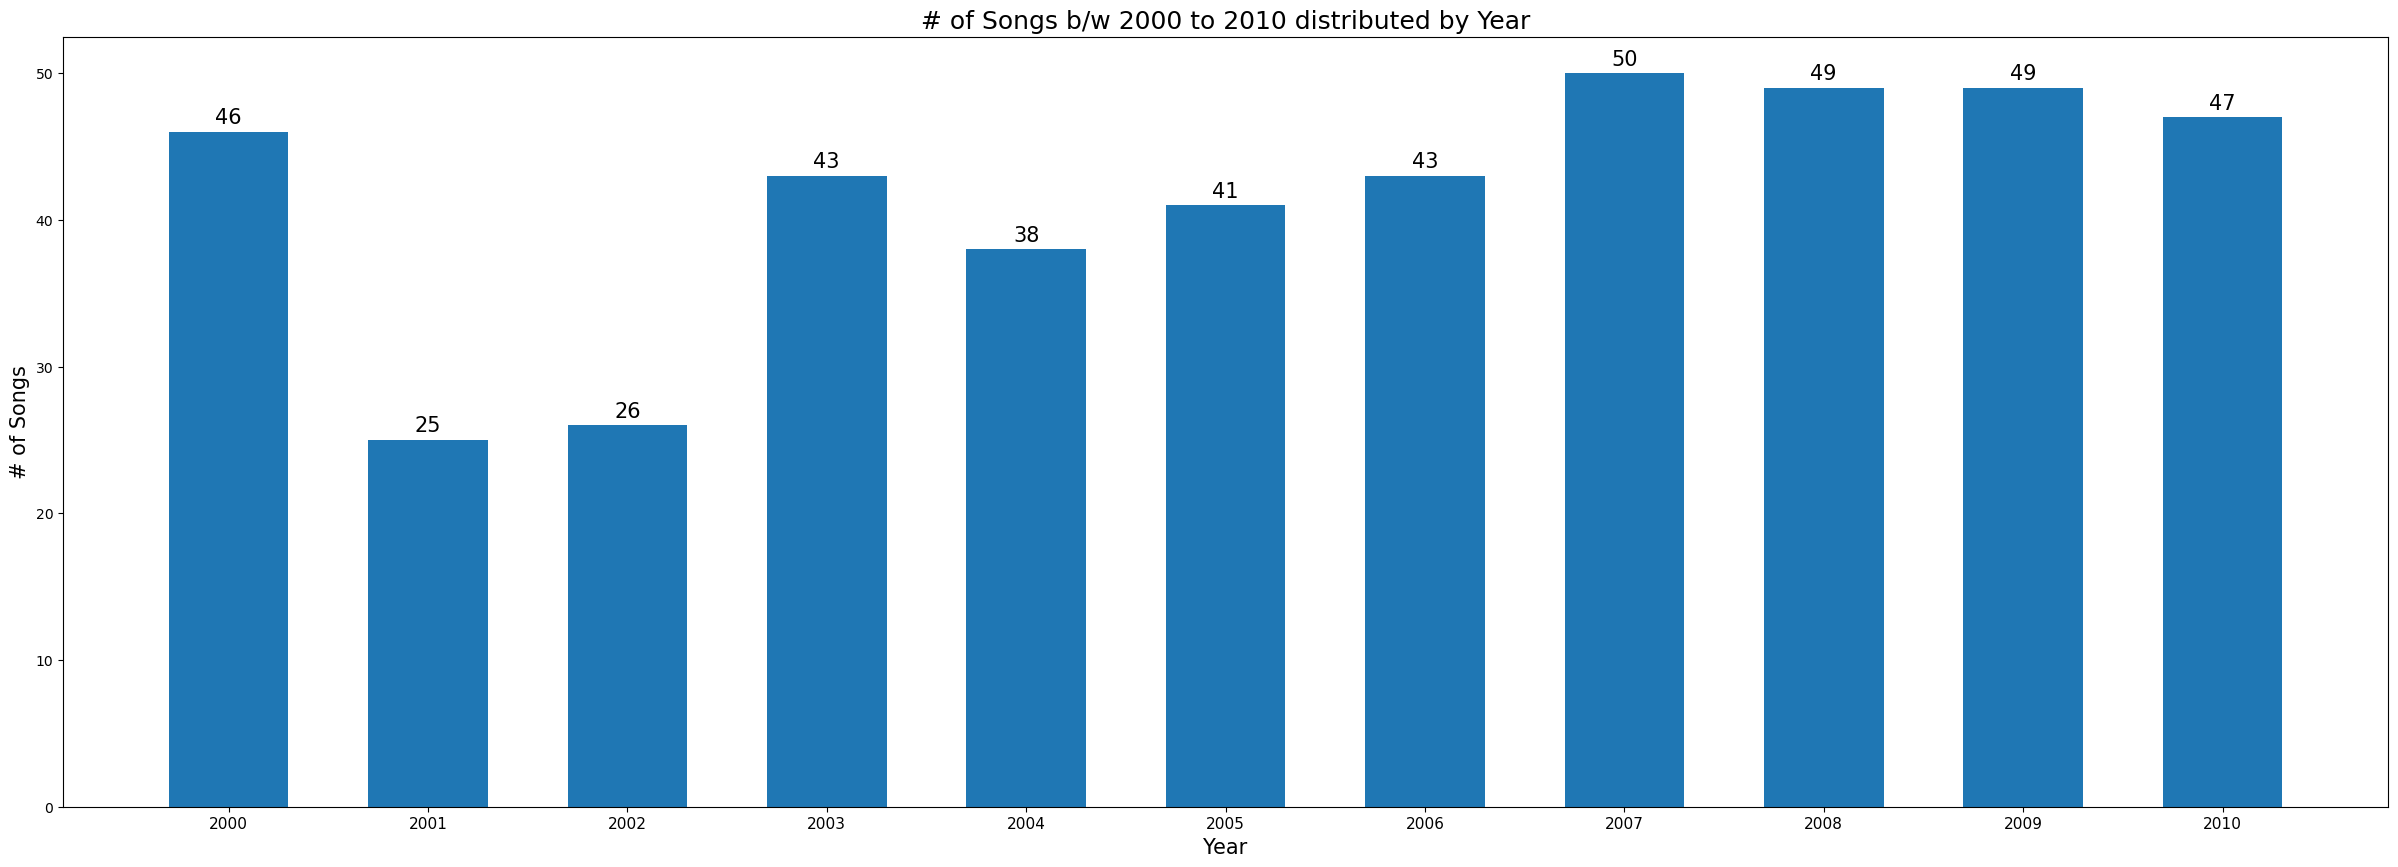

In [308]:
year_list = list(sorted(df[df['Year_Bins'] == '2000 to 2010']['Year_of_Release_Date'].unique()))
Song_count = list(df[df['Year_Bins'] == '2000 to 2010'].groupby('Year_of_Release_Date')['Songs'].count().sort_index(ascending = True))

plt.figure(figsize=(30,10))
bars = plt.bar(year_list, Song_count,width=0.6)
plt.bar_label(bars,padding=3, color='black', fontsize= 15)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('# of Songs',fontsize= 15)
plt.title('# of Songs b/w 2000 to 2010 distributed by Year',fontsize= 18)
plt.xticks(year_list,fontsize= 11)
plt.show()

#### Songs from 2011 to 2019 

In [309]:
print(f"Total number of Liked Songs between 2011 and 2019: {df[df['Year_Bins'] == '2011 to 2019'].shape[0]}")

Total number of Liked Songs between 2011 and 2019: 807


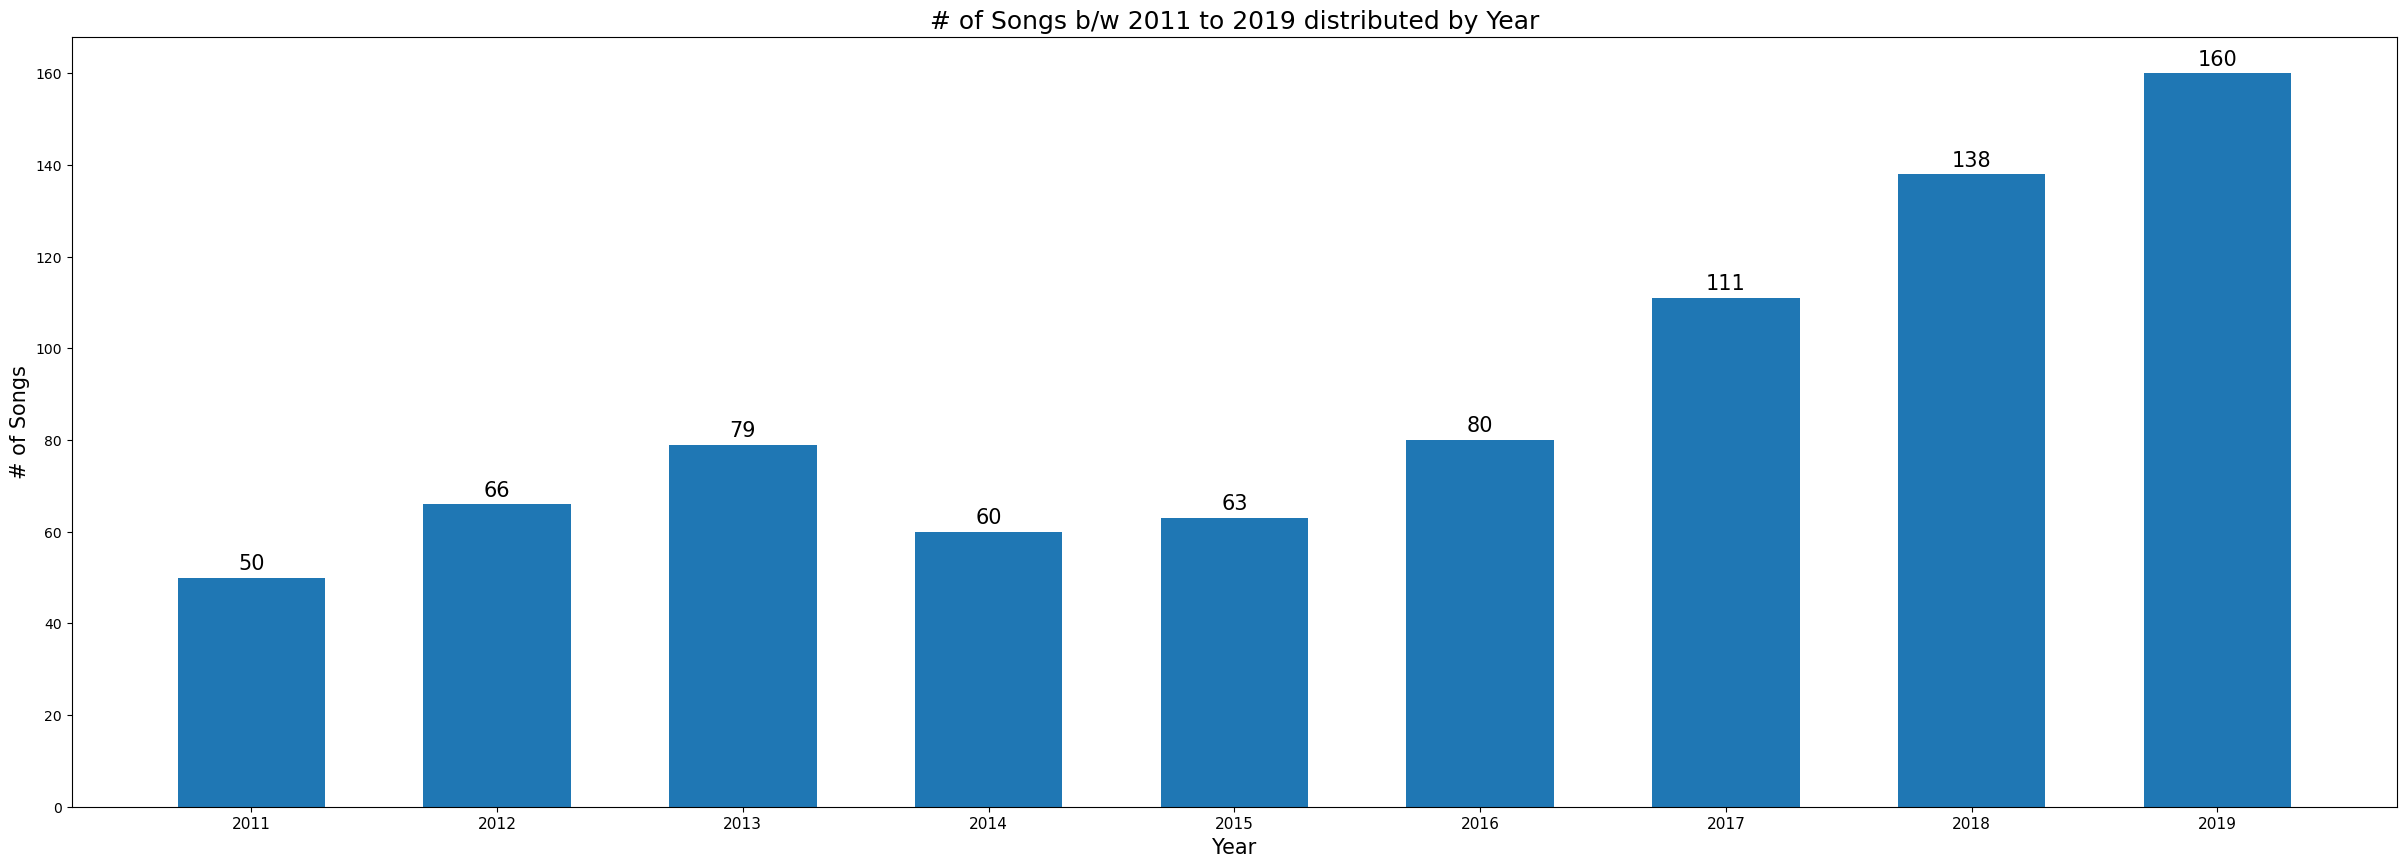

In [310]:
year_list = list(sorted(df[df['Year_Bins'] == '2011 to 2019']['Year_of_Release_Date'].unique()))
Song_count = list(df[df['Year_Bins'] == '2011 to 2019'].groupby('Year_of_Release_Date')['Songs'].count().sort_index(ascending = True))

plt.figure(figsize=(30,10))
bars = plt.bar(year_list, Song_count,width=0.6)
plt.bar_label(bars,padding=3, color='black', fontsize= 15)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('# of Songs',fontsize= 15)
plt.title('# of Songs b/w 2011 to 2019 distributed by Year',fontsize= 18)
plt.xticks(year_list,fontsize= 11)
plt.show()

#### Songs from 2020 to 2025 

In [311]:
print(f"Total number of Liked Songs between 2020 and 2025: {df[df['Year_Bins'] == '2020 to 2025'].shape[0]}")

Total number of Liked Songs between 2020 and 2025: 994


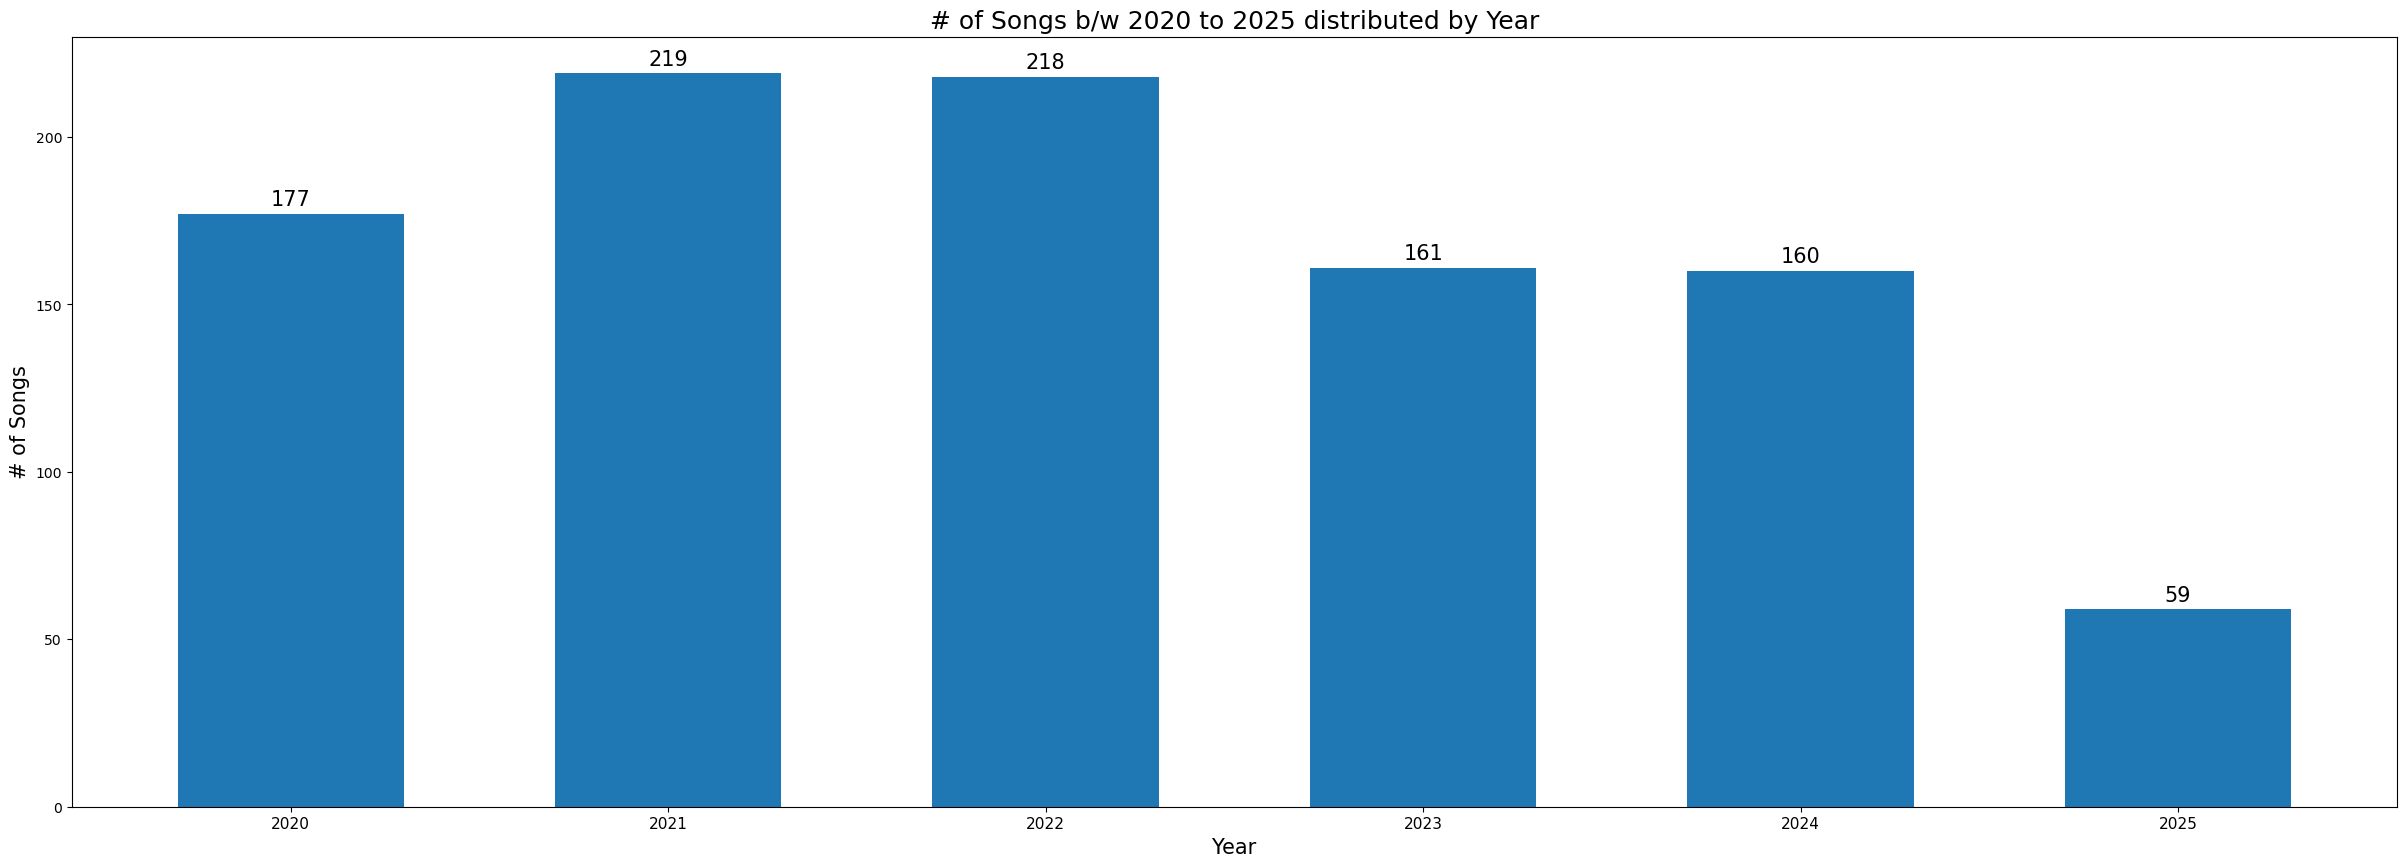

In [312]:
year_list = list(sorted(df[df['Year_Bins'] == '2020 to 2025']['Year_of_Release_Date'].unique()))
Song_count = list(df[df['Year_Bins'] == '2020 to 2025'].groupby('Year_of_Release_Date')['Songs'].count().sort_index(ascending = True))

plt.figure(figsize=(30,10))
bars = plt.bar(year_list, Song_count,width=0.6)
plt.bar_label(bars,padding=3, color='black', fontsize= 15)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('# of Songs',fontsize= 15)
plt.title('# of Songs b/w 2020 to 2025 distributed by Year',fontsize= 18)
plt.xticks(year_list,fontsize= 11)
plt.show()

### Songs from 1952 to 2025 

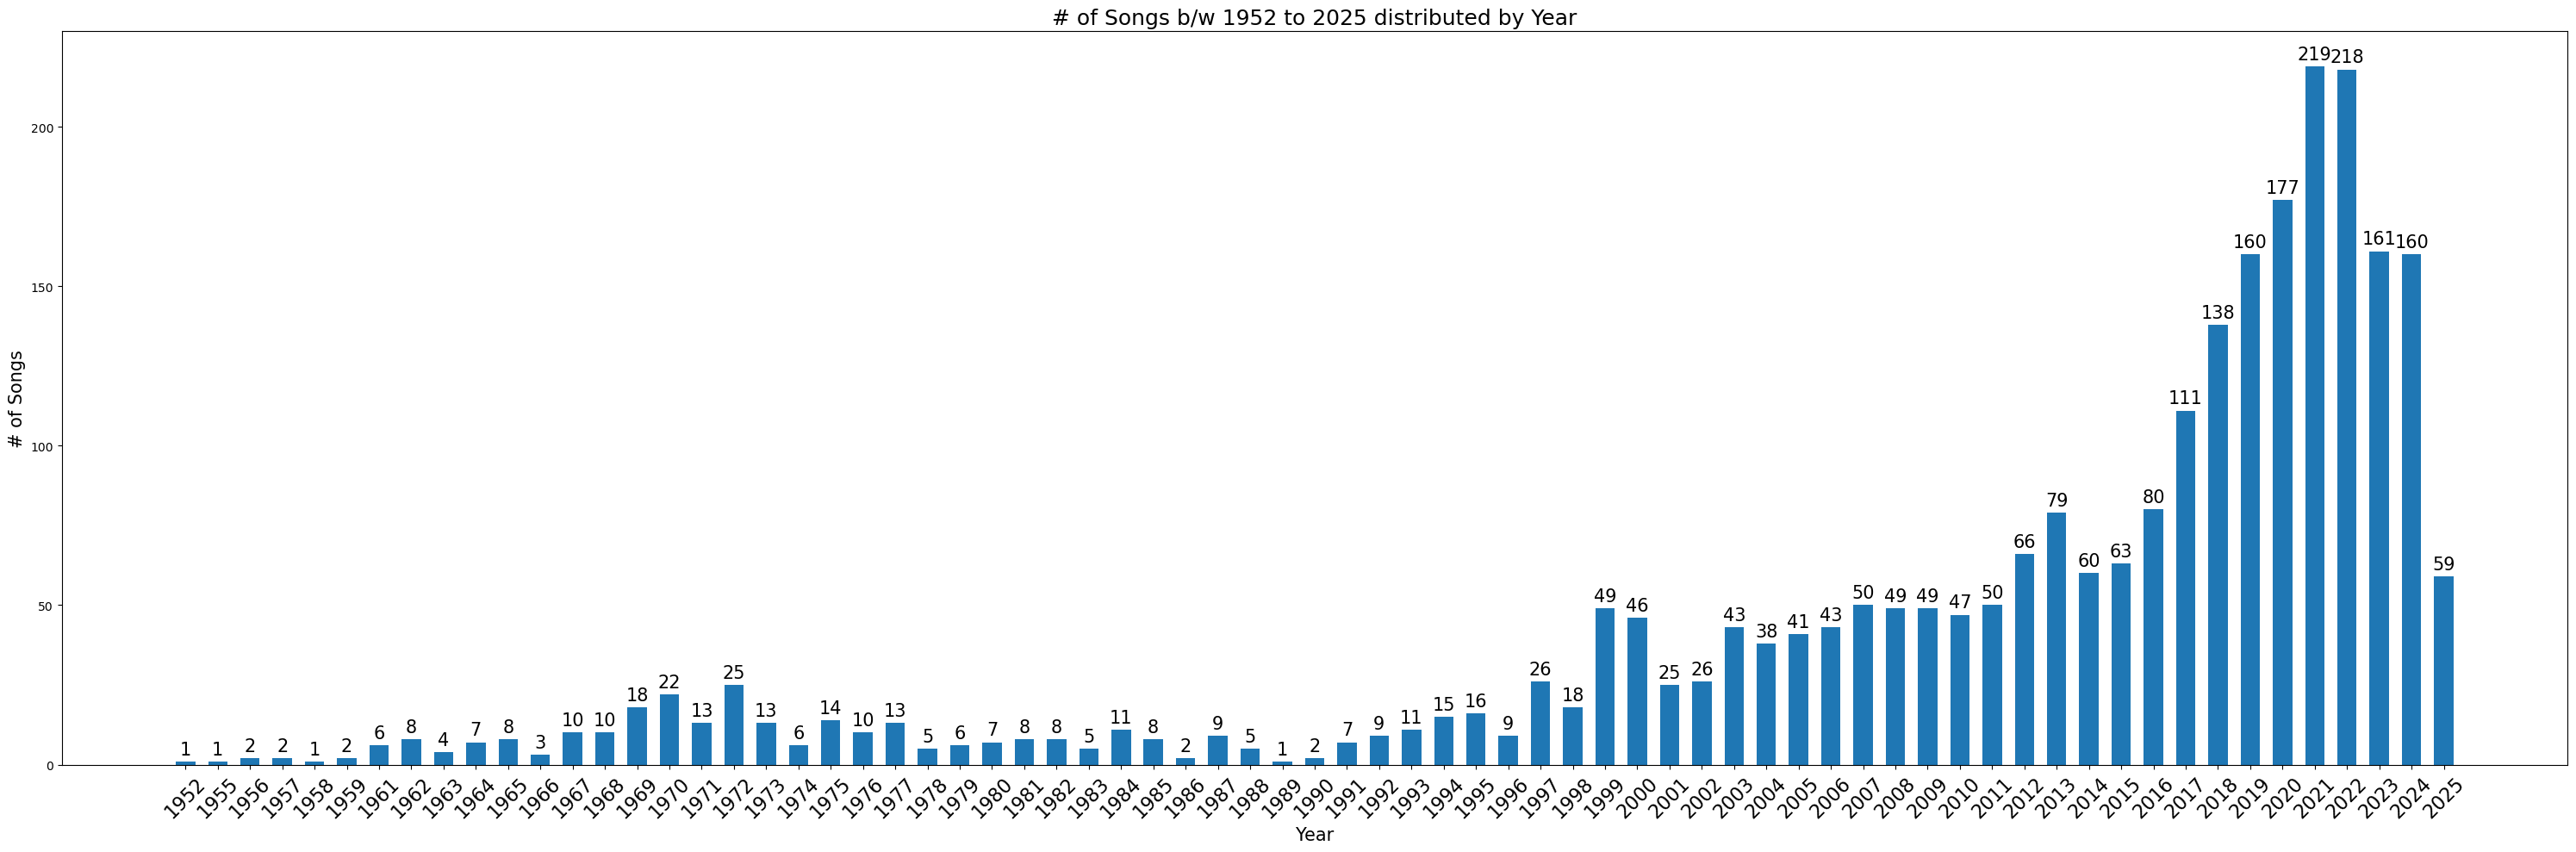

In [313]:

year_list = list(sorted(df['Year_of_Release_Date'].unique()))
Song_count = list(df.groupby('Year_of_Release_Date')['Songs'].count().sort_index(ascending=True))

# Create x positions with spacing
x_pos = np.arange(len(year_list))  # positions for the bars

plt.figure(figsize=(30,10))
bars = plt.bar(x_pos, Song_count, width=0.6)  # use x_pos instead of year_list
plt.bar_label(bars, padding=3, color='black', fontsize=15)

plt.xlabel('Year', fontsize=15)
plt.ylabel('# of Songs', fontsize=15)
plt.title('# of Songs b/w 1952 to 2025 distributed by Year', fontsize=18)

# Set custom tick labels for years
plt.xticks(x_pos, year_list, fontsize=16, rotation=45)  # rotate if needed
plt.tight_layout()
plt.show()


#Code from ChatGPT: https://chatgpt.com/share/6886feff-354c-8010-84e9-0c3da6a93ceb

### Song Counts data is left skewed

###  Visualizing the distribution of "Popularity of Songs"  

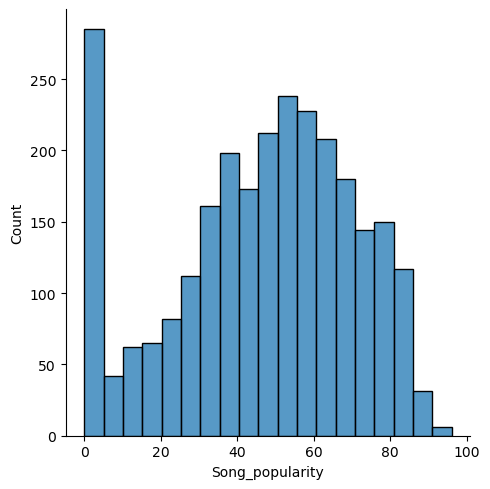

In [314]:
sns.displot(df, x= "Song_popularity",  binwidth= 5)

In [315]:
df[df['Song_popularity'] <= 5].shape

(285, 9)

In [316]:
df[df['Song_popularity'] >= 90].shape

(9, 9)

### Extracting Artist Popularity and Artist Followers

In [317]:
batch_size = 30
artist_ids = df['Artist_id']
artist_popularity = []
artist_followers = []
artist_ids = df['Artist_id'].tolist()

for i in range(0, len(artist_ids), batch_size):
    batch = artist_ids[i:i + batch_size]
    results = sp.artists(batch)  # Fetch data for multiple artists at once
    
    for artist in results['artists']:  #results is a dictionary and we are fetching results['artists']. Then results['artists'] is a list of dictionaries
        artist_popularity.append(artist['popularity'])
        artist_followers.append(artist['followers']['total'])


In [318]:
# df.head()

In [319]:
df['Artist_popularity'] = artist_popularity
df['Artist_followers'] = artist_followers

In [320]:
df.columns

Index(['Song_Saved_Date', 'Songs', 'Song_id', 'Song_popularity', 'Artists',
       'Artist_id', 'Release_Date', 'Year_of_Release_Date', 'Year_Bins',
       'Artist_popularity', 'Artist_followers'],
      dtype='object')

In [321]:
df.shape

(2694, 11)

In [322]:
new_order = ['Song_Saved_Date','Artists','Songs', 'Song_popularity', 'Release_Date',  'Year_of_Release_Date', 'Year_Bins','Artist_id', 'Song_id',
        'Artist_popularity', 'Artist_followers']

In [323]:
df = df[new_order] #Rearranging the order of Columns

In [324]:
df.head()

,Song_Saved_Date,Artists,Songs,Song_popularity,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id,Artist_popularity,Artist_followers
0,2025-08-16,Leon Bridges,Forgive You,51,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii,77,1890552
1,2025-08-16,Leon Bridges,Beyond,74,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0,77,1890552
2,2025-08-16,Eric Gabriel,Down the Line,29,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a,22,1135
3,2025-08-14,Krishna Das,Sita Ram,33,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I,56,395688
4,2025-08-13,Chuck Adams,Iris,54,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK,48,28831


In [325]:
#Create a dictionary with Artist ID as the key and Genre which is the list as the value
#Then  append that to the artist dataframe

### Extracting Artist Genre

In [326]:
df['Artist_id'].nunique()

1156

In [327]:
batch_size = 50
artist_genre = {}
artist_ids = df['Artist_id'].tolist()

for i in range(0, len(artist_ids), batch_size):
    batch = artist_ids[i:i + batch_size] #batch will contain the list of artist ids in a batch of 50 in one iteration
    results = sp.artists(batch)  # Fetch data for 50 artists at once i.e in one iteration of for loop
    
    for artist in results['artists']:  #results is a dictionary and we are fetching results['artists']. Then results['artists'] is a list of dictionaries
        artist_genre[artist['id']] = artist['genres']

In [328]:
len(artist_genre)

1156

In [329]:
artist_genre

{'3qnGvpP8Yth1AqSBMqON5x': ['retro soul'],
 '0Mpu2CWzVWzHsKiVt9nPVx': [],
 '7BIXafmacnax46P30TEzNz': ['bhajan', 'devotional'],
 '6GLO5F72p0eTCcumR6Ac5a': [],
 '2sil8z5kiy4r76CRTXxBCA': [],
 '0sSxphmGskGCKlwB9xa6WU': ['bollywood', 'hindi pop', 'desi'],
 '61JrslREXq98hurYL2hYoc': ['ghazal',
  'bollywood',
  'bhajan',
  'hindi pop',
  'marathi pop'],
 '3nU1DJyXFkJps0WK4mDniK': [],
 '4lsAzbWcYZblSVl1zhT9bc': [],
 '1fctva4kpRbg2k3v7kwRuS': ['trap latino'],
 '3ZpEKRjHaHANcpk10u6Ntq': ['afrobeats',
  'afrobeat',
  'afropop',
  'afro r&b',
  'afropiano',
  'afro soul'],
 '6R1T5YklzC9OFugGt8RwOD': [],
 '6FIrstf3kHEg3zBOyLpvxD': ['baroque pop'],
 '0YrtvWJMgSdVrk3SfNjTbx': [],
 '4ZWvN9FEfdTea1SEHjpTNi': ['indie rock'],
 '0SwO7SWeDHJijQ3XNS7xEE': ['indie'],
 '0OdUWJ0sBjDrqHygGUXeCF': [],
 '5Kmr0b3ip8g9P2i0dLTC3Z': ['stutter house'],
 '3IYUhFvPQItj6xySrBmZkd': ['classic rock', 'southern rock', 'country rock'],
 '70B80Lwx2sxti0M1Ng9e8K': ['bollywood', 'hindi pop', 'desi'],
 '3q7HBObVc0L8jNeTe5Gofh':

In [330]:
df2 = pd.DataFrame([{'Artist_id': k, 'Genre': genre} for k, genres in artist_genre.items() for genre in genres]) 
#This concept is called List Comprehension, learnt from ChatGPT
# ChatGpt Explanation: https://chatgpt.com/share/680e8827-785c-8010-9756-d354fd375929

In [331]:
df2.shape #df2 will have more rows than df['Artist_id'] because the the Artist id will be repeated if the artist has more than 1  genre

(2104, 2)

In [332]:
df2.head()

,Artist_id,Genre
0,3qnGvpP8Yth1AqSBMqON5x,retro soul
1,7BIXafmacnax46P30TEzNz,bhajan
2,7BIXafmacnax46P30TEzNz,devotional
3,0sSxphmGskGCKlwB9xa6WU,bollywood
4,0sSxphmGskGCKlwB9xa6WU,hindi pop


In [333]:
df2['Artist_id'].nunique()

829

In [334]:
df['Artist_id'].nunique()

1156

In [335]:
df2.Genre.nunique()

286

In [336]:
# Artist_genre_count = df2.groupby('Genre').agg({'Artist_id':'count'}).rename(columns={'Artist_id': 'Artist_count'})
#Artist_genre_count['Artist_count'].sort_values(ascending = False)
## Artist_genre_count[Artist_genre_count['Artist_count'] >9]

### Making the "df" dataframe unique on Artist Id and Artist name  to perform a left join on df2 dataframe

In [337]:
artist_temp = {}
for a,b,c,d in zip(df['Artist_id'],df['Artists'],df['Artist_popularity'], df['Artist_followers']):
    artist_temp[a] = [b,c,d]

In [338]:
artist_temp

{'3qnGvpP8Yth1AqSBMqON5x': ['Leon Bridges', 77, 1890552],
 '0Mpu2CWzVWzHsKiVt9nPVx': ['Eric Gabriel', 22, 1135],
 '7BIXafmacnax46P30TEzNz': ['Krishna Das', 56, 395688],
 '6GLO5F72p0eTCcumR6Ac5a': ['Chuck Adams', 48, 28831],
 '2sil8z5kiy4r76CRTXxBCA': ['The Goo Goo Dolls', 80, 3334855],
 '0sSxphmGskGCKlwB9xa6WU': ['Himesh Reshammiya', 76, 11789296],
 '61JrslREXq98hurYL2hYoc': ['Lata Mangeshkar', 81, 22844444],
 '3nU1DJyXFkJps0WK4mDniK': ['Twinjabi', 38, 37461],
 '4lsAzbWcYZblSVl1zhT9bc': ['Tom Rhodes', 42, 7742],
 '1fctva4kpRbg2k3v7kwRuS': ['Rvssian', 75, 2723649],
 '3ZpEKRjHaHANcpk10u6Ntq': ['Ayra Starr', 78, 5230111],
 '6R1T5YklzC9OFugGt8RwOD': ['Cloud Cult', 41, 56320],
 '6FIrstf3kHEg3zBOyLpvxD': ['Ra Ra Riot', 45, 208451],
 '0YrtvWJMgSdVrk3SfNjTbx': ['Death Cab for Cutie', 65, 1593284],
 '4ZWvN9FEfdTea1SEHjpTNi': ['Pinback', 50, 166556],
 '0SwO7SWeDHJijQ3XNS7xEE': ['MGMT', 77, 3517341],
 '0OdUWJ0sBjDrqHygGUXeCF': ['Band of Horses', 63, 1040925],
 '5Kmr0b3ip8g9P2i0dLTC3Z': ['Disco Li

In [339]:
artist_temp_df = pd.DataFrame([{'Artist_id': k, 'Artists': Artists[0], 'Artist_popularity': Artists[1], 'Artist_followers': Artists[2]} for k, Artists in artist_temp.items()]) 

In [340]:
artist_temp_df

,Artist_id,Artists,Artist_popularity,Artist_followers
0,3qnGvpP8Yth1AqSBMqON5x,Leon Bridges,77,1890552
1,0Mpu2CWzVWzHsKiVt9nPVx,Eric Gabriel,22,1135
2,7BIXafmacnax46P30TEzNz,Krishna Das,56,395688
3,6GLO5F72p0eTCcumR6Ac5a,Chuck Adams,48,28831
4,2sil8z5kiy4r76CRTXxBCA,The Goo Goo Dolls,80,3334855
...,...,...,...,...
1151,2NjfBq1NflQcKSeiDooVjY,Tones And I,71,2993957
1152,3iOvXCl6edW5Um0fXEBRXy,The xx,67,3797875
1153,5fOzKeaM5PmZ2BcKKAtFeq,8D Tunes,61,525442
1154,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,89,46457819


In [341]:
df.Artist_id.nunique()

1156

In [342]:
artist_temp_df.Artist_id.nunique()

1156

In [343]:
df_Artist = pd.merge(df2, artist_temp_df, on = 'Artist_id', how  ='left')

In [344]:
df_Artist

,Artist_id,Genre,Artists,Artist_popularity,Artist_followers
0,3qnGvpP8Yth1AqSBMqON5x,retro soul,Leon Bridges,77,1890552
1,7BIXafmacnax46P30TEzNz,bhajan,Krishna Das,56,395688
2,7BIXafmacnax46P30TEzNz,devotional,Krishna Das,56,395688
3,0sSxphmGskGCKlwB9xa6WU,bollywood,Himesh Reshammiya,76,11789296
4,0sSxphmGskGCKlwB9xa6WU,hindi pop,Himesh Reshammiya,76,11789296
...,...,...,...,...,...
2099,5ChF3i92IPZHduM7jN3dpg,progressive house,Nicky Romero,65,2169663
2100,4AVFqumd2ogHFlRbKIjp1t,edm,Alesso,77,4026764
2101,6M2wZ9GZgrQXHCFfjv46we,pop,Dua Lipa,89,46457819
2102,6AUpl7JjUGpUCe7QVsEZzy,devotional,Saivite,28,8242


In [345]:
new_order = ['Artist_id', 'Artists', 'Genre', 'Artist_followers', 'Artist_popularity']
df_Artist = df_Artist[new_order]

In [346]:
df_Artist

,Artist_id,Artists,Genre,Artist_followers,Artist_popularity
0,3qnGvpP8Yth1AqSBMqON5x,Leon Bridges,retro soul,1890552,77
1,7BIXafmacnax46P30TEzNz,Krishna Das,bhajan,395688,56
2,7BIXafmacnax46P30TEzNz,Krishna Das,devotional,395688,56
3,0sSxphmGskGCKlwB9xa6WU,Himesh Reshammiya,bollywood,11789296,76
4,0sSxphmGskGCKlwB9xa6WU,Himesh Reshammiya,hindi pop,11789296,76
...,...,...,...,...,...
2099,5ChF3i92IPZHduM7jN3dpg,Nicky Romero,progressive house,2169663,65
2100,4AVFqumd2ogHFlRbKIjp1t,Alesso,edm,4026764,77
2101,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,pop,46457819,89
2102,6AUpl7JjUGpUCe7QVsEZzy,Saivite,devotional,8242,28


In [347]:
df2['Artist_id'].nunique()

829

In [348]:
df_Artist['Artist_id'].nunique()

829

In [349]:
# df_Artist.to_excel('output.xlsx', index=False)

In [350]:
Artist_genre_count = df_Artist.groupby('Genre').agg({'Artist_id':'count'}).rename(columns={'Artist_id': 'Artist_count'})

In [351]:
Artist_genre_count['Artist_count'].sort_values(ascending = False)

Genre
bollywood      125
techno         116
hindi pop       99
desi            91
acid techno     64
              ... 
hyphy            1
idm              1
indie pop        1
indie r&b        1
zydeco           1
Name: Artist_count, Length: 286, dtype: int64

### Analysizing the Popularity of Songs in "df" dataframe

In [352]:
df.columns

Index(['Song_Saved_Date', 'Artists', 'Songs', 'Song_popularity',
       'Release_Date', 'Year_of_Release_Date', 'Year_Bins', 'Artist_id',
       'Song_id', 'Artist_popularity', 'Artist_followers'],
      dtype='object')

<Axes: >

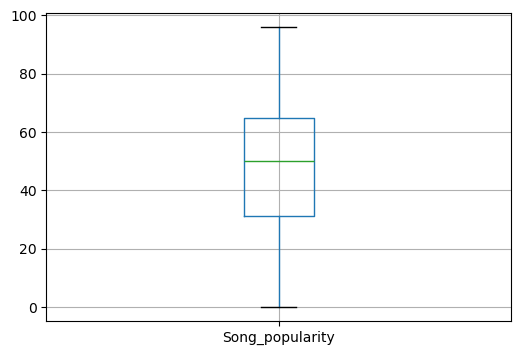

In [353]:
df.boxplot(column= 'Song_popularity', fontsize=10, figsize=(6, 4))

In [354]:
df['Song_popularity'].quantile(0.25)

31.25

In [355]:
df['Song_popularity'].quantile(0.75)

65.0

In [356]:
df['Song_popularity'].quantile(0.90)

77.0

In [357]:
df['Song_popularity'].max()

96

In [358]:
df[df['Song_popularity'] < 10].shape

(322, 11)

In [359]:
df[df['Song_popularity'] >= 90].shape

(9, 11)

In [360]:
Popularity = []
def popularity(Song_popularity):
    for x in Song_popularity:
        if x <= 49:
           Popularity.append('Not Popular')
        elif x >=50:
            Popularity.append('Popular')
popularity(df['Song_popularity'])

In [361]:
df.columns

Index(['Song_Saved_Date', 'Artists', 'Songs', 'Song_popularity',
       'Release_Date', 'Year_of_Release_Date', 'Year_Bins', 'Artist_id',
       'Song_id', 'Artist_popularity', 'Artist_followers'],
      dtype='object')

In [362]:
df['Song_Popularity_Binary'] = Popularity

C:\Users\Owner\AppData\Local\Temp\ipykernel_15704\854430456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Song_Popularity_Binary'] = Popularity


In [363]:
df['Song_Popularity_Binary'].value_counts(normalize = True) 

Song_Popularity_Binary
Popular        0.503712
Not Popular    0.496288
Name: proportion, dtype: float64

In [364]:
new_order = ['Song_Saved_Date','Artists','Songs', 'Song_popularity', 'Song_Popularity_Binary', 'Release_Date',  'Year_of_Release_Date', 'Year_Bins','Artist_id', 'Song_id',
        'Artist_popularity', 'Artist_followers']
df = df[new_order]

In [365]:
df

,Song_Saved_Date,Artists,Songs,Song_popularity,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id,Artist_popularity,Artist_followers
0,2025-08-16,Leon Bridges,Forgive You,51,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii,77,1890552
1,2025-08-16,Leon Bridges,Beyond,74,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0,77,1890552
2,2025-08-16,Eric Gabriel,Down the Line,29,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a,22,1135
3,2025-08-14,Krishna Das,Sita Ram,33,Not Popular,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I,56,395688
4,2025-08-13,Chuck Adams,Iris,54,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK,48,28831
...,...,...,...,...,...,...,...,...,...,...,...,...
2704,2020-04-23,The xx,Intro,6,Not Popular,2009-08-16,2009,2000 to 2010,3iOvXCl6edW5Um0fXEBRXy,0bXpmJyHHYPk6QBFj25bYF,67,3797875
2705,2020-04-20,8D Tunes,Dance Monkey (8D Audio),12,Not Popular,2020-01-24,2020,2020 to 2025,5fOzKeaM5PmZ2BcKKAtFeq,4KgAFt6Tt4E96poxgq5dVJ,61,525442
2706,2020-04-19,Dua Lipa,Don't Start Now,74,Popular,2019-10-31,2019,2011 to 2019,6M2wZ9GZgrQXHCFfjv46we,6WrI0LAC5M1Rw2MnX2ZvEg,89,46457819
2707,2020-04-19,Passenger,Hotel California (Cover),48,Not Popular,2017-07-02,2017,2011 to 2019,0gadJ2b9A4SKsB1RFkBb66,5nS9WEWYnbQDBAe81SHhDP,72,3721469


### Analysing Song Popularity by Year (1952 to 2025)

In [366]:
df['Year_Bins'].unique()

['2011 to 2019', '2020 to 2025', '2000 to 2010', '1977 to 1999', '1952 to 1976']
Categories (5, object): ['1952 to 1976' < '1977 to 1999' < '2000 to 2010' < '2011 to 2019' < '2020 to 2025']

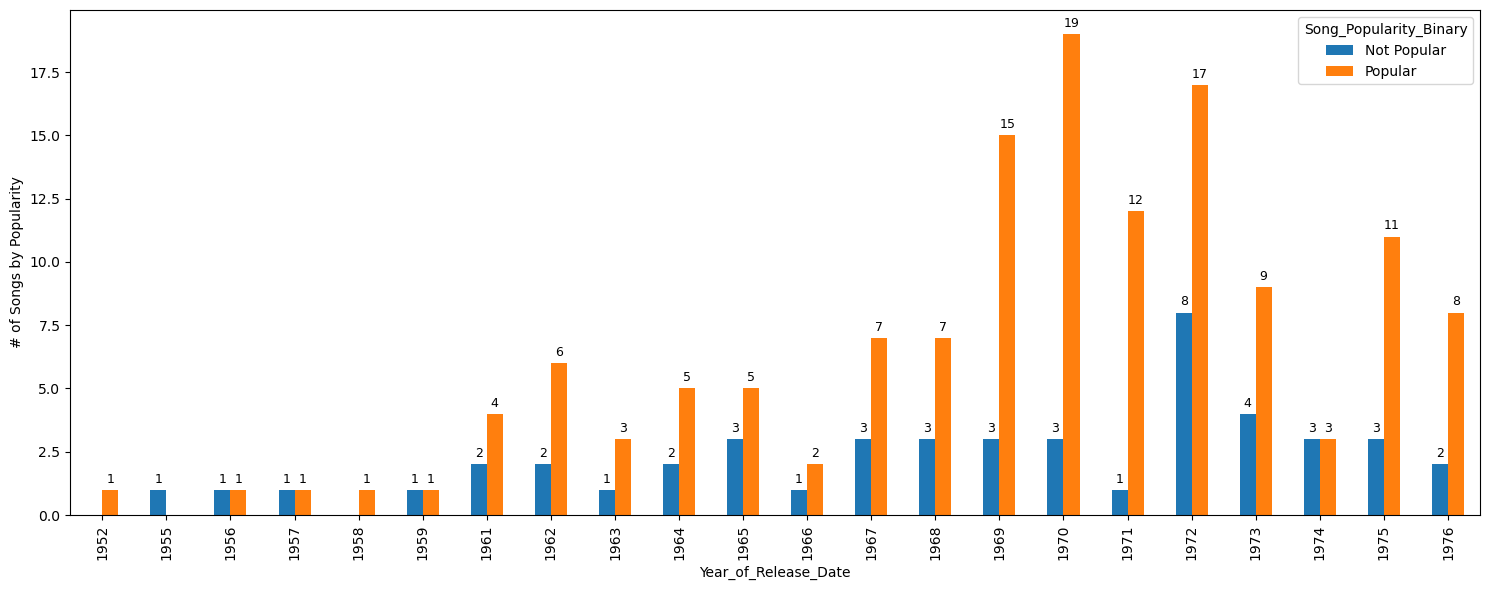

In [367]:
filtered_df = df[df['Year_Bins'] == '1952 to 1976']
crosstab = pd.crosstab(filtered_df['Year_of_Release_Date'], filtered_df['Song_Popularity_Binary'])

# Create plot and capture Axes
ax = crosstab.plot.bar(figsize=(15, 6))

# Add value labels on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.ylabel("# of Songs by Popularity")
plt.tight_layout()
plt.show()

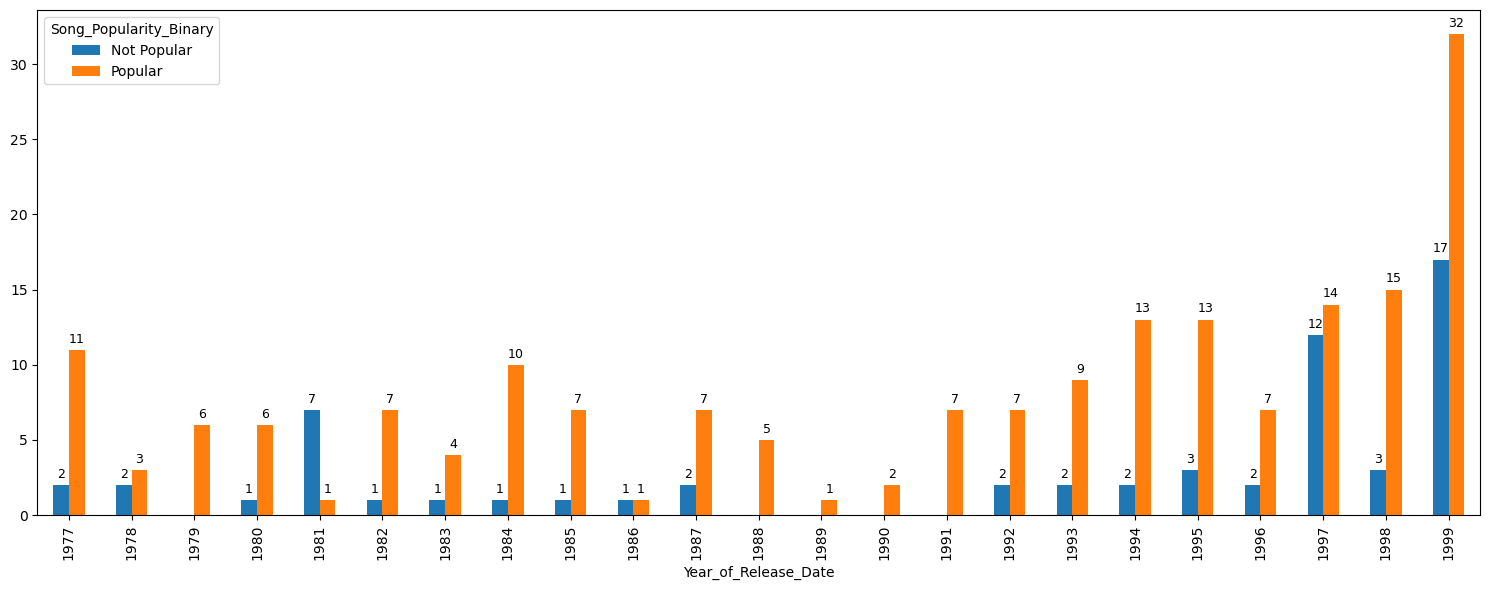

In [368]:
filtered_df = df[df['Year_Bins'] == '1977 to 1999']
crosstab = pd.crosstab(filtered_df['Year_of_Release_Date'], filtered_df['Song_Popularity_Binary'])

# Create plot and capture Axes
ax = crosstab.plot.bar(figsize=(15, 6))

# Add value labels on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

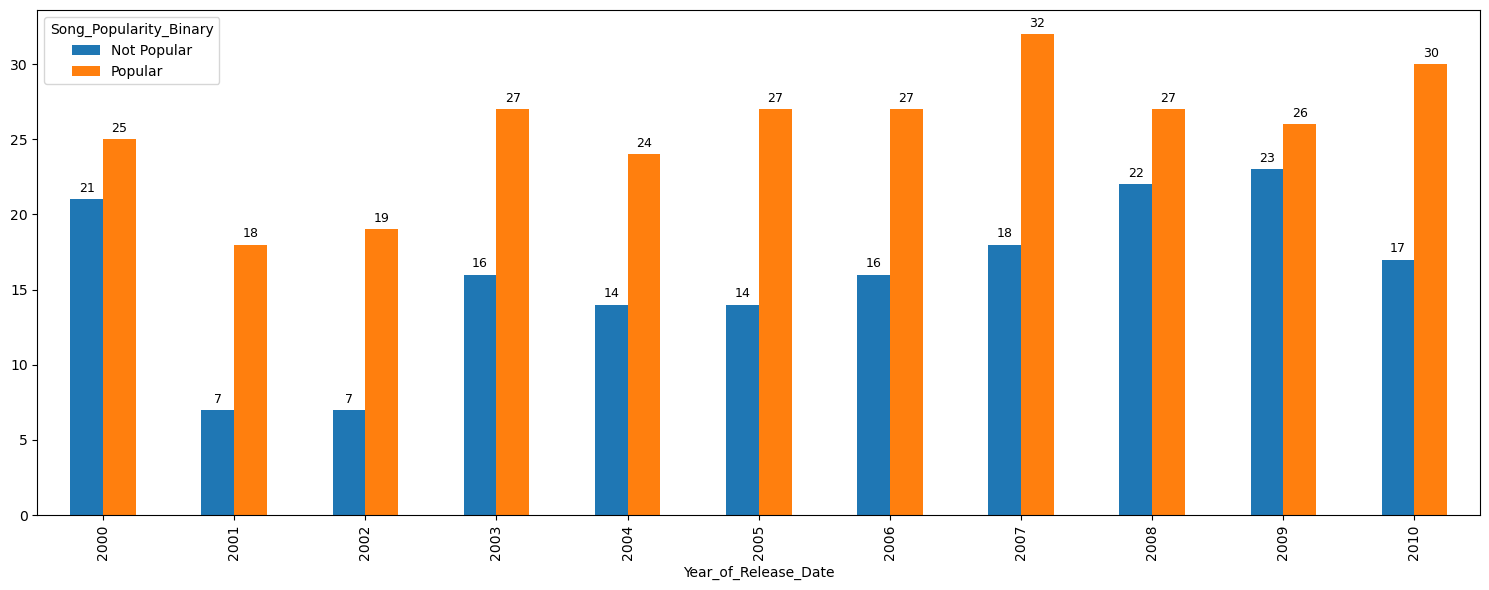

In [369]:
filtered_df = df[df['Year_Bins'] == '2000 to 2010']
crosstab = pd.crosstab(filtered_df['Year_of_Release_Date'], filtered_df['Song_Popularity_Binary'])

# Create plot and capture Axes
ax = crosstab.plot.bar(figsize=(15, 6))

# Add value labels on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

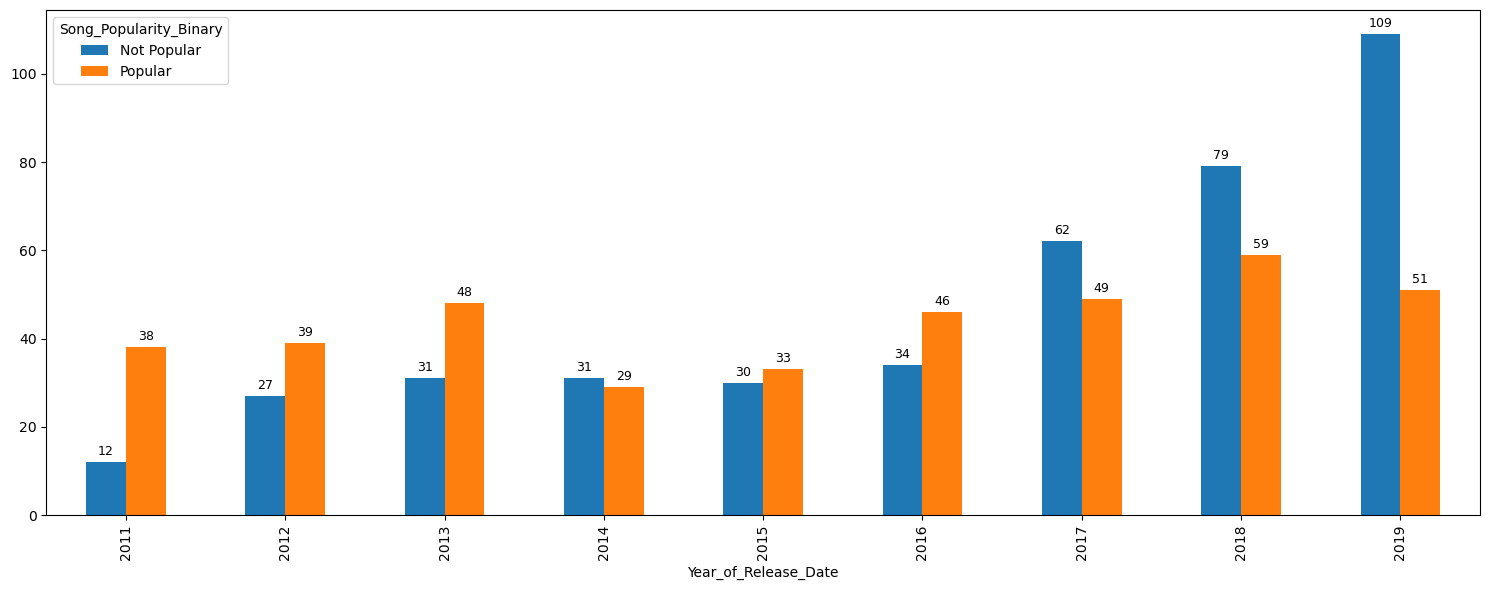

In [370]:
filtered_df = df[df['Year_Bins'] == '2011 to 2019']
crosstab = pd.crosstab(filtered_df['Year_of_Release_Date'], filtered_df['Song_Popularity_Binary'])

# Create plot and capture Axes
ax = crosstab.plot.bar(figsize=(15, 6))

# Add value labels on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

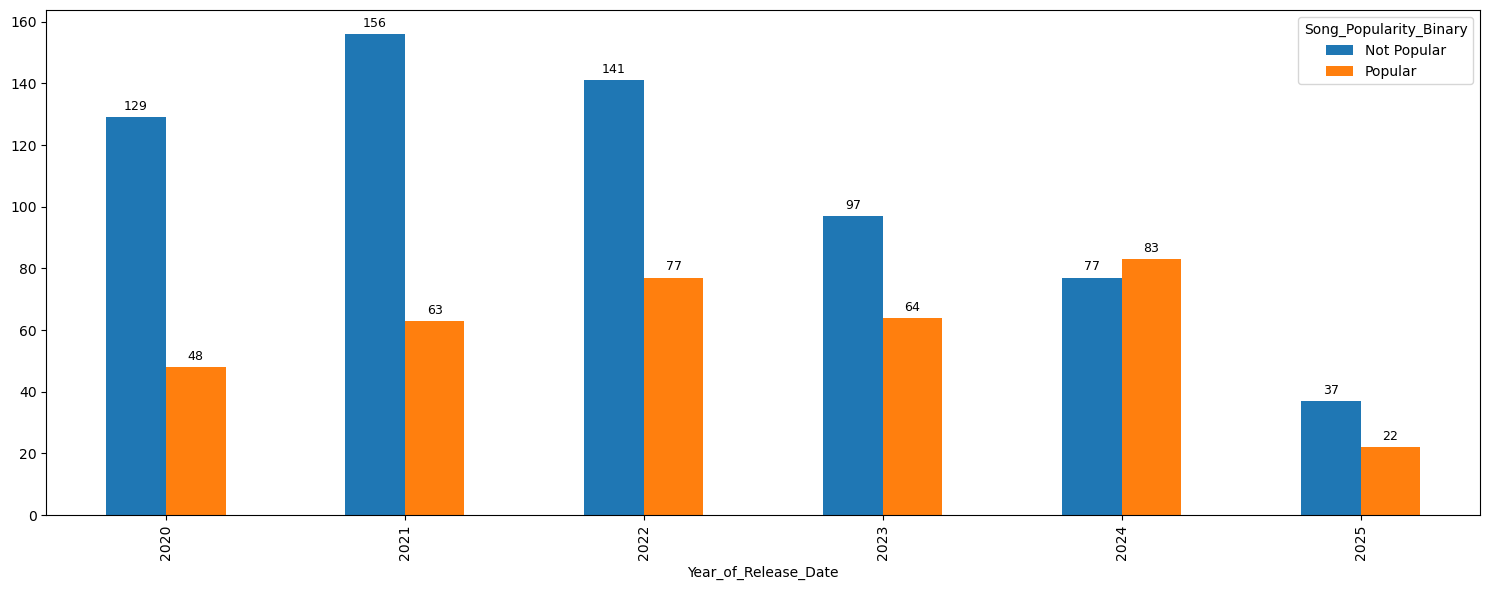

In [371]:
filtered_df = df[df['Year_Bins'] == '2020 to 2025']
crosstab = pd.crosstab(filtered_df['Year_of_Release_Date'], filtered_df['Song_Popularity_Binary'])

# Create plot and capture Axes
ax = crosstab.plot.bar(figsize=(15, 6))

# Add value labels on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

##### This is a cumulative view of Song Popularity from 1952 to 2025

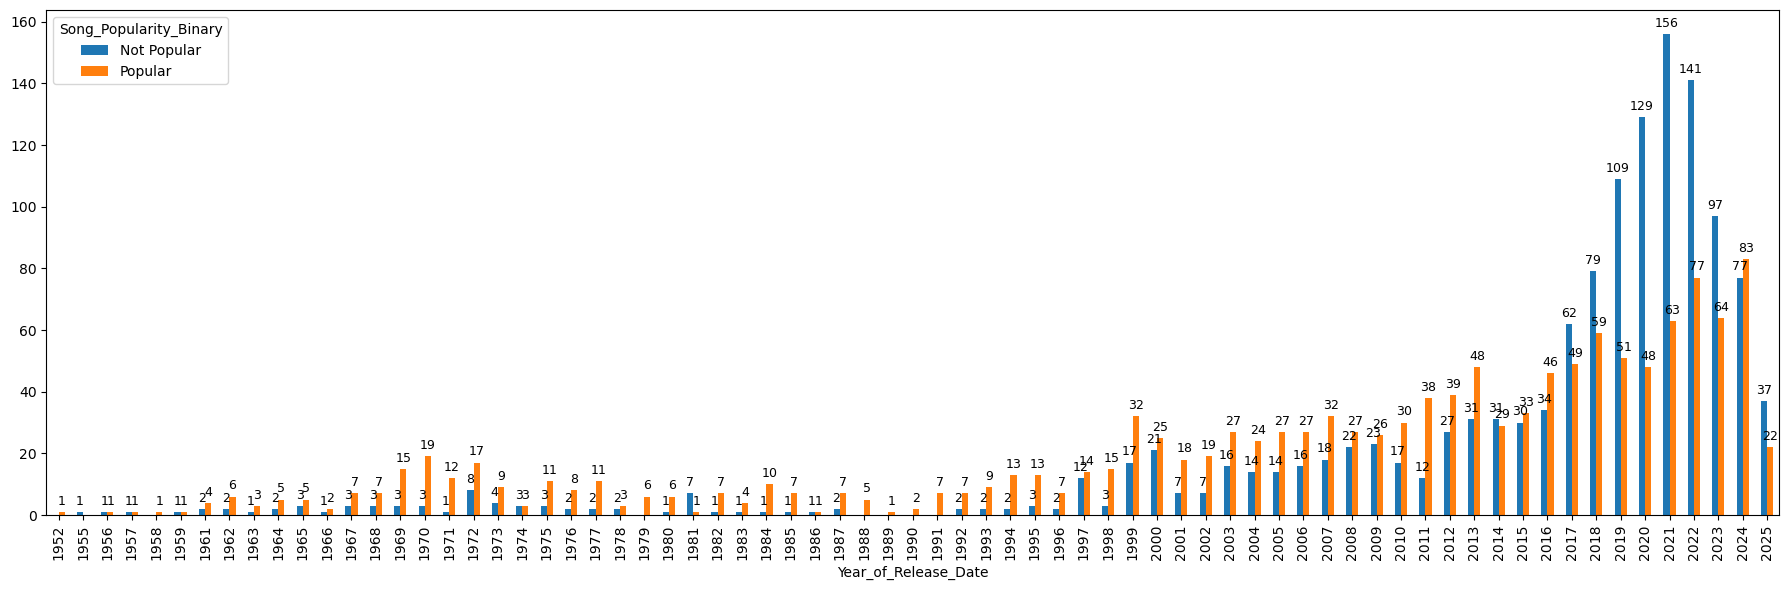

In [372]:
crosstab = pd.crosstab(df['Year_of_Release_Date'], df['Song_Popularity_Binary'])

# Create plot and capture Axes
ax = crosstab.plot.bar(figsize=(18, 6))

# Add value labels on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Analysing Song Popularity against Artists

In [373]:
Artist_crosstab = pd.crosstab(df['Artists'], df['Song_Popularity_Binary'])

In [374]:
Artist_crosstab

Song_Popularity_Binary,Not Popular,Popular
Artists,,
&ME,1,6
21 Savage,0,4
24kGoldn,0,1
2Pac,0,5
2facebleed,1,0
...,...,...
sunflwr,1,0
the fashion show,1,0
tomy wyne,0,1


In [375]:
df['Artist_id'].nunique()

1156

#### Artists song count where Popular Songs = Not Popular Songs

In [376]:
Artist_crosstab[Artist_crosstab['Popular'] == Artist_crosstab['Not Popular']].sort_values(ascending = False, by = 'Not Popular')

Song_Popularity_Binary,Not Popular,Popular
Artists,,
Sukhwinder Singh,9,9
Jagjit Singh,8,8
The Local Train,4,4
daniel.mp3,3,3
The Postal Service,3,3
Sajid-Wajid,3,3
King,2,2
The Flaming Lips,2,2
Mohit Chauhan,2,2


#### Artists song count where Popular Songs < Not Popular Songs

In [377]:
Artist_crosstab[Artist_crosstab['Popular'] < Artist_crosstab['Not Popular']].sort_values(ascending = False, by = 'Not Popular')

Song_Popularity_Binary,Not Popular,Popular
Artists,,
Deborah de Luca,55,2
Lane 8,23,5
Charlotte de Witte,22,1
Worakls,19,3
Ballarak,18,0
...,...,...
HouseWerk,1,0
Hooved,1,0
Hitkend House Lab,1,0


#### Artists song count where Popular Songs > Not Popular Songs

In [378]:
Artist_crosstab[Artist_crosstab['Popular'] > Artist_crosstab['Not Popular']].sort_values(ascending = False, by = 'Not Popular')

Song_Popularity_Binary,Not Popular,Popular
Artists,,
Udit Narayan,6,16
Post Malone,6,20
Amit Trivedi,6,9
Pritam,5,33
The Paper Kites,4,8
...,...,...
Guy Gerber,0,1
Gurnazar,0,1
Gunna,0,1


In [379]:
df.head()

,Song_Saved_Date,Artists,Songs,Song_popularity,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id,Artist_popularity,Artist_followers
0,2025-08-16,Leon Bridges,Forgive You,51,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii,77,1890552
1,2025-08-16,Leon Bridges,Beyond,74,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0,77,1890552
2,2025-08-16,Eric Gabriel,Down the Line,29,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a,22,1135
3,2025-08-14,Krishna Das,Sita Ram,33,Not Popular,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I,56,395688
4,2025-08-13,Chuck Adams,Iris,54,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK,48,28831


In [380]:
Artist_Songs_Pop = df.groupby('Artists').agg({'Artist_followers': 'max', 'Artist_popularity': 'max', 'Songs': 'count', 'Song_popularity': 'mean'}).rename(columns={'Artist_popularity': 'Artist_popularity', 'Songs':'Song_count','Song_popularity':'Song_popularity_mean', 'Artist_followers': 'Artist_followers'}).round(2)
Artist_Songs_Pop = Artist_Songs_Pop.sort_values(ascending = False, by = 'Song_count').reset_index()

In [381]:
Artist_Songs_Pop

,Artists,Artist_followers,Artist_popularity,Song_count,Song_popularity_mean
0,Deborah de Luca,560432,56,57,23.04
1,Pritam,55761615,91,38,62.55
2,Kishore Kumar,17866820,80,29,44.83
3,Lane 8,451028,62,28,40.29
4,Post Malone,47383284,90,26,55.35
...,...,...,...,...,...
1150,Karan Kanchan,45090,55,1,11.00
1151,Kardinal Offishall,129840,66,1,77.00
1152,Karthik Rao,19000,34,1,19.00
1153,Katashi Kaitō,3487,44,1,27.00


In [382]:
Artist_Songs_Pop_temp = Artist_Songs_Pop[Artist_Songs_Pop['Song_count'] >=10]
Artist_Songs_Pop_temp.head()

,Artists,Artist_followers,Artist_popularity,Song_count,Song_popularity_mean
0,Deborah de Luca,560432,56,57,23.04
1,Pritam,55761615,91,38,62.55
2,Kishore Kumar,17866820,80,29,44.83
3,Lane 8,451028,62,28,40.29
4,Post Malone,47383284,90,26,55.35


In [383]:
len(list(Artist_Songs_Pop_temp['Artists'].values))

39

### Analyzing Artist's # of songs against Song Popularity for artists with >= 10 songs

C:\Users\Owner\AppData\Local\Temp\ipykernel_15704\3735111404.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Artist_Songs_Pop_temp['Artists'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_15704\3735111404.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 90)


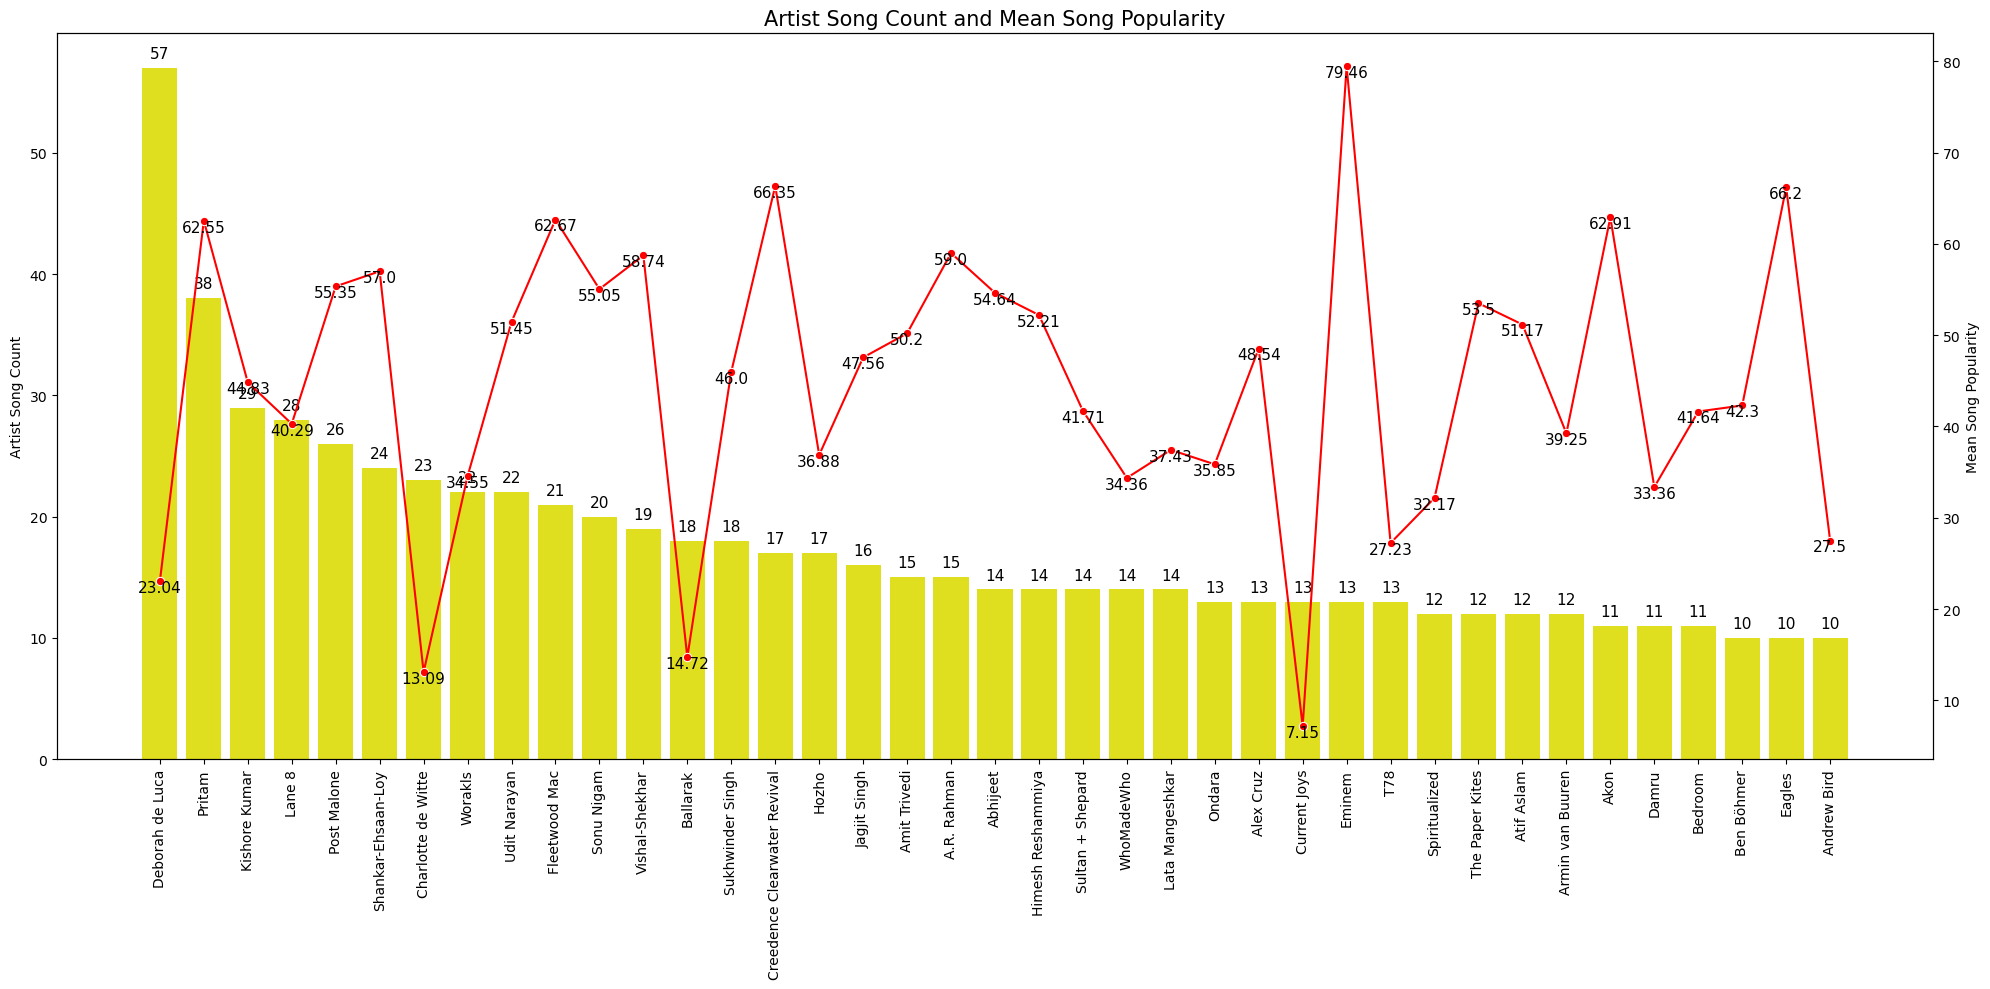

In [384]:
fig, ax1 = plt.subplots(figsize=(20, 10))

x_pos = np.arange(len(Artist_Songs_Pop_temp['Artists']))  # positions for the bars

sns.barplot(x= x_pos, y='Song_count', data= Artist_Songs_Pop_temp, ax= ax1, color= 'yellow')

# Add value labels on top of bars
for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax1.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,5),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=11)

ax1.set_xticklabels(Artist_Songs_Pop_temp['Artists'])  
ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 90)
ax1.set_ylabel('Artist Song Count', color='black')
#ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
sns.lineplot(x= x_pos, y= 'Song_popularity_mean', data= Artist_Songs_Pop_temp, ax=ax2, color='red', marker='o') # Or plt.plot()
ax2.set_ylabel('Mean Song Popularity', color='black')
ax2.tick_params(axis='y', labelcolor='black')
for i, value in enumerate(Artist_Songs_Pop_temp['Song_popularity_mean']):
    if not np.isnan(value):
        ax2.annotate(f'{value}',
                     xy=(x_pos[i], value),
                     xytext=(0, -10),
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=11, color='black')
plt.title('Artist Song Count and Mean Song Popularity', fontsize = 15)
fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [385]:
df.shape

(2694, 12)

In [386]:
df.columns

Index(['Song_Saved_Date', 'Artists', 'Songs', 'Song_popularity',
       'Song_Popularity_Binary', 'Release_Date', 'Year_of_Release_Date',
       'Year_Bins', 'Artist_id', 'Song_id', 'Artist_popularity',
       'Artist_followers'],
      dtype='object')

In [387]:
Artist_Songs_Count = df.groupby('Artists').agg({'Songs': 'count'}).rename(columns={'Songs':'Song_Count'}).round(2)
Artist_Songs_Count = Artist_Songs_Count.sort_values(ascending = False, by = 'Song_Count').reset_index()

In [388]:
temp = df.groupby('Artists').agg({'Artist_id': 'count'}).rename(columns={'Artist_id':'Artists_Count'}).round(2)
temp = temp.sort_values(ascending = False, by = 'Artists_Count').reset_index()

In [389]:
temp

,Artists,Artists_Count
0,Deborah de Luca,57
1,Pritam,38
2,Kishore Kumar,29
3,Lane 8,28
4,Post Malone,26
...,...,...
1150,Karan Kanchan,1
1151,Kardinal Offishall,1
1152,Karthik Rao,1
1153,Katashi Kaitō,1


### Analyzing Artist's Popularity against Average Song Popularity for artists with >= 10 songs

C:\Users\Owner\AppData\Local\Temp\ipykernel_15704\3860809174.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Artist_Songs_Pop_temp['Artists'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_15704\3860809174.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 90)


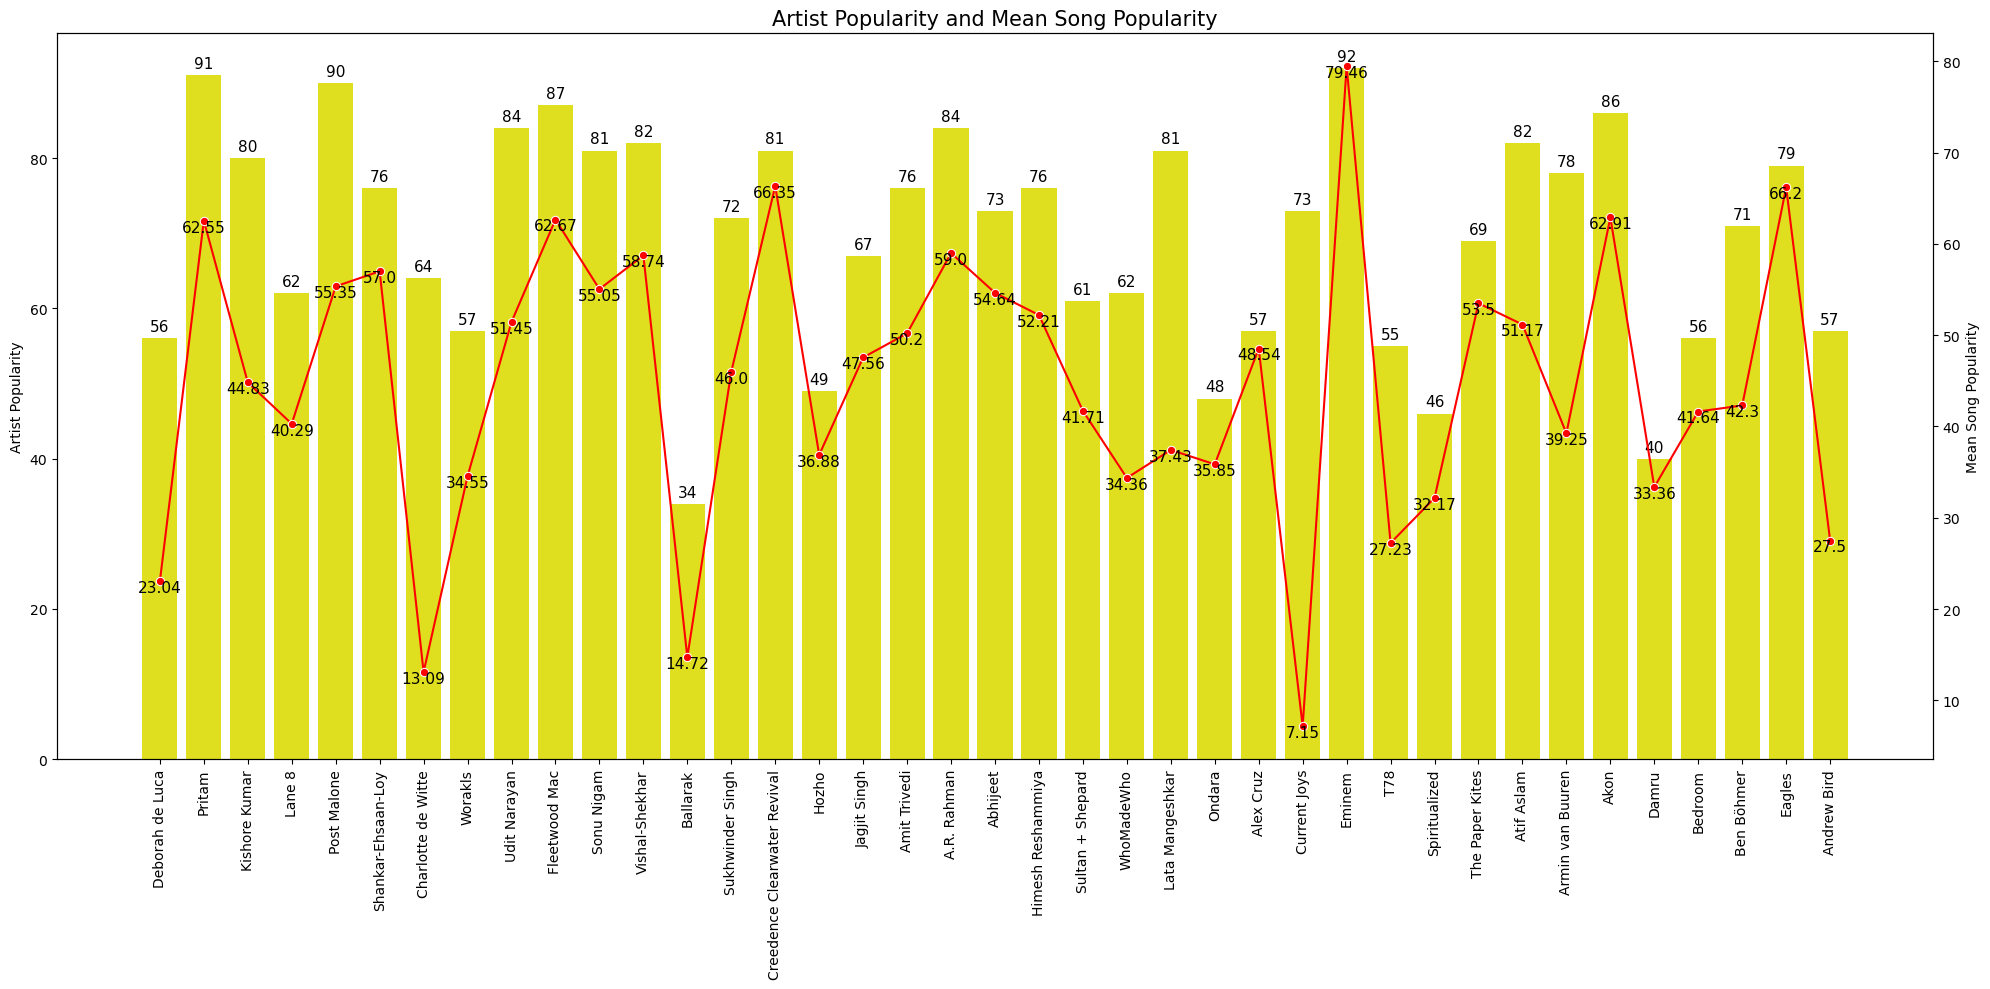

In [390]:
fig, ax1 = plt.subplots(figsize=(20, 10))

x_pos = np.arange(len(Artist_Songs_Pop_temp['Artists']))  # positions for the bars

sns.barplot(x= x_pos, y='Artist_popularity', data= Artist_Songs_Pop_temp, ax= ax1, color= 'yellow')

# Add value labels on top of bars
for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax1.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=11)

ax1.set_xticklabels(Artist_Songs_Pop_temp['Artists'])  
ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 90)
ax1.set_ylabel('Artist Popularity', color='black')
#ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
sns.lineplot(x= x_pos, y= 'Song_popularity_mean', data= Artist_Songs_Pop_temp, ax=ax2, color='red', marker='o') # Or plt.plot()
ax2.set_ylabel('Mean Song Popularity', color='black')
ax2.tick_params(axis='y', labelcolor='black')
for i, value in enumerate(Artist_Songs_Pop_temp['Song_popularity_mean']):
    if not np.isnan(value):
        ax2.annotate(f'{value}',
                     xy=(x_pos[i], value),
                     xytext=(0,-10),
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=11, color='black')
plt.title('Artist Popularity and Mean Song Popularity', fontsize = 15)
fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [391]:
df.columns

Index(['Song_Saved_Date', 'Artists', 'Songs', 'Song_popularity',
       'Song_Popularity_Binary', 'Release_Date', 'Year_of_Release_Date',
       'Year_Bins', 'Artist_id', 'Song_id', 'Artist_popularity',
       'Artist_followers'],
      dtype='object')

In [392]:
df.head()

,Song_Saved_Date,Artists,Songs,Song_popularity,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id,Artist_popularity,Artist_followers
0,2025-08-16,Leon Bridges,Forgive You,51,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii,77,1890552
1,2025-08-16,Leon Bridges,Beyond,74,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0,77,1890552
2,2025-08-16,Eric Gabriel,Down the Line,29,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a,22,1135
3,2025-08-14,Krishna Das,Sita Ram,33,Not Popular,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I,56,395688
4,2025-08-13,Chuck Adams,Iris,54,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK,48,28831


In [393]:
df.Year_Bins.value_counts()

Year_Bins
2020 to 2025    994
2011 to 2019    807
2000 to 2010    457
1977 to 1999    250
1952 to 1976    186
Name: count, dtype: int64

In [394]:
df[df['Year_of_Release_Date'] == 2025].reset_index(drop = True)

,Song_Saved_Date,Artists,Songs,Song_popularity,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id,Artist_popularity,Artist_followers
0,2025-08-16,Eric Gabriel,Down the Line,29,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a,22,1135
1,2025-08-13,Chuck Adams,Iris,54,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK,48,28831
2,2025-08-09,Disco Lines,No Broke Boys,91,Popular,2025-06-06,2025,2020 to 2025,5Kmr0b3ip8g9P2i0dLTC3Z,3cZajhyr8LmtPfHZ9296tj,77,230308
3,2025-07-30,Joey Myron,Love You or Leave You,41,Not Popular,2025-06-13,2025,2020 to 2025,4baMXYKAKEfErCf84fOwyY,6i6udxGE0oh4601MmxKXCR,47,5752
4,2025-07-30,AP Dhillon,Thodi Si Daaru,80,Popular,2025-07-17,2025,2020 to 2025,6LEG9Ld1aLImEFEVHdWNSB,3JiLQJmVW7d4O8AQDFB3oj,79,8157747
5,2025-07-26,Chestford,Ushuaia,45,Not Popular,2025-02-27,2025,2020 to 2025,5PcUT5NbLJw3JDelNvymQS,3Fp6grbpC4JnUIGmEl6CEZ,44,918
6,2025-07-21,Jack Willard,Everything All At Once,43,Not Popular,2025-05-28,2025,2020 to 2025,0DIqQmQ7dKsuCPx6LDJWK7,6GVwBMdjAAgI59pyvxa1XR,43,2427
7,2025-07-21,Christian Löffler,Free,54,Popular,2025-07-17,2025,2020 to 2025,3tSvlEzeDnVbQJBTkIA6nO,5jkzcYe3UjM7VyrlZyiXax,57,306794
8,2025-07-21,Colyn,1973,52,Popular,2025-07-10,2025,2020 to 2025,5vr1GvUstxr6nwxniKqLOh,3fCowMGKkshKs0iwAdxZBd,53,91938
9,2025-07-06,Eliott Allemand,Lead Me On,40,Not Popular,2025-05-30,2025,2020 to 2025,37YbdzU1kxjmyiuSlafR1m,4kqZuOSfiKyt3WzHw3JCST,30,491


In [395]:
df[df['Year_of_Release_Date'] == 2025].shape

(59, 12)

In [396]:
df.columns

Index(['Song_Saved_Date', 'Artists', 'Songs', 'Song_popularity',
       'Song_Popularity_Binary', 'Release_Date', 'Year_of_Release_Date',
       'Year_Bins', 'Artist_id', 'Song_id', 'Artist_popularity',
       'Artist_followers'],
      dtype='object')

In [397]:
df

,Song_Saved_Date,Artists,Songs,Song_popularity,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id,Artist_popularity,Artist_followers
0,2025-08-16,Leon Bridges,Forgive You,51,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii,77,1890552
1,2025-08-16,Leon Bridges,Beyond,74,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0,77,1890552
2,2025-08-16,Eric Gabriel,Down the Line,29,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a,22,1135
3,2025-08-14,Krishna Das,Sita Ram,33,Not Popular,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I,56,395688
4,2025-08-13,Chuck Adams,Iris,54,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK,48,28831
...,...,...,...,...,...,...,...,...,...,...,...,...
2704,2020-04-23,The xx,Intro,6,Not Popular,2009-08-16,2009,2000 to 2010,3iOvXCl6edW5Um0fXEBRXy,0bXpmJyHHYPk6QBFj25bYF,67,3797875
2705,2020-04-20,8D Tunes,Dance Monkey (8D Audio),12,Not Popular,2020-01-24,2020,2020 to 2025,5fOzKeaM5PmZ2BcKKAtFeq,4KgAFt6Tt4E96poxgq5dVJ,61,525442
2706,2020-04-19,Dua Lipa,Don't Start Now,74,Popular,2019-10-31,2019,2011 to 2019,6M2wZ9GZgrQXHCFfjv46we,6WrI0LAC5M1Rw2MnX2ZvEg,89,46457819
2707,2020-04-19,Passenger,Hotel California (Cover),48,Not Popular,2017-07-02,2017,2011 to 2019,0gadJ2b9A4SKsB1RFkBb66,5nS9WEWYnbQDBAe81SHhDP,72,3721469


### 1) Analyze: Song Saved Date - In which year was the most # of songs were saved

### 2) Analyze: Song Saved Date - In which year was the Least # of songs were saved

### 3) Create a line chart of number of saved songs over the course of year

### 4) Do Month over Month or Year over Year calculation of number of songs saved

In [398]:
Song_Saved_Date_Year = []
def extracting_year(date):
    for yr in date:
        Song_Saved_Date_Year.append(yr[:4])
    df['Song_Saved_Date_Year'] = Song_Saved_Date_Year 
extracting_year(df['Song_Saved_Date'])

In [399]:
df

,Song_Saved_Date,Artists,Songs,Song_popularity,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id,Artist_popularity,Artist_followers,Song_Saved_Date_Year
0,2025-08-16,Leon Bridges,Forgive You,51,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii,77,1890552,2025
1,2025-08-16,Leon Bridges,Beyond,74,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0,77,1890552,2025
2,2025-08-16,Eric Gabriel,Down the Line,29,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a,22,1135,2025
3,2025-08-14,Krishna Das,Sita Ram,33,Not Popular,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I,56,395688,2025
4,2025-08-13,Chuck Adams,Iris,54,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK,48,28831,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,2020-04-23,The xx,Intro,6,Not Popular,2009-08-16,2009,2000 to 2010,3iOvXCl6edW5Um0fXEBRXy,0bXpmJyHHYPk6QBFj25bYF,67,3797875,2020
2705,2020-04-20,8D Tunes,Dance Monkey (8D Audio),12,Not Popular,2020-01-24,2020,2020 to 2025,5fOzKeaM5PmZ2BcKKAtFeq,4KgAFt6Tt4E96poxgq5dVJ,61,525442,2020
2706,2020-04-19,Dua Lipa,Don't Start Now,74,Popular,2019-10-31,2019,2011 to 2019,6M2wZ9GZgrQXHCFfjv46we,6WrI0LAC5M1Rw2MnX2ZvEg,89,46457819,2020
2707,2020-04-19,Passenger,Hotel California (Cover),48,Not Popular,2017-07-02,2017,2011 to 2019,0gadJ2b9A4SKsB1RFkBb66,5nS9WEWYnbQDBAe81SHhDP,72,3721469,2020


In [400]:
df.groupby('Song_Saved_Date_Year')['Songs'].count().sort_index(ascending = True)

Song_Saved_Date_Year
2020     32
2021    157
2022    523
2023    693
2024    672
2025    617
Name: Songs, dtype: int64

In [401]:
Song_Saved_Date_Year_Month = []
def extracting_year(date):
    for month in date:
        Song_Saved_Date_Year_Month.append(month[:-3])
    df['Song_Saved_Date_Year_Month'] = Song_Saved_Date_Year_Month 
extracting_year(df['Song_Saved_Date'])

In [402]:
df.head()

,Song_Saved_Date,Artists,Songs,Song_popularity,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id,Artist_popularity,Artist_followers,Song_Saved_Date_Year,Song_Saved_Date_Year_Month
0,2025-08-16,Leon Bridges,Forgive You,51,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii,77,1890552,2025,2025-08
1,2025-08-16,Leon Bridges,Beyond,74,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0,77,1890552,2025,2025-08
2,2025-08-16,Eric Gabriel,Down the Line,29,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a,22,1135,2025,2025-08
3,2025-08-14,Krishna Das,Sita Ram,33,Not Popular,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I,56,395688,2025,2025-08
4,2025-08-13,Chuck Adams,Iris,54,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK,48,28831,2025,2025-08


In [403]:
new_order = ['Song_Saved_Date_Year_Month','Song_Saved_Date_Year','Song_Saved_Date','Artists','Songs', 'Song_popularity', 'Song_Popularity_Binary', 'Release_Date',  'Year_of_Release_Date', 'Year_Bins','Artist_id', 'Song_id',
        'Artist_popularity', 'Artist_followers']
df = df[new_order]

In [404]:
df

,Song_Saved_Date_Year_Month,Song_Saved_Date_Year,Song_Saved_Date,Artists,Songs,Song_popularity,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id,Artist_popularity,Artist_followers
0,2025-08,2025,2025-08-16,Leon Bridges,Forgive You,51,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii,77,1890552
1,2025-08,2025,2025-08-16,Leon Bridges,Beyond,74,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0,77,1890552
2,2025-08,2025,2025-08-16,Eric Gabriel,Down the Line,29,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a,22,1135
3,2025-08,2025,2025-08-14,Krishna Das,Sita Ram,33,Not Popular,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I,56,395688
4,2025-08,2025,2025-08-13,Chuck Adams,Iris,54,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK,48,28831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,2020-04,2020,2020-04-23,The xx,Intro,6,Not Popular,2009-08-16,2009,2000 to 2010,3iOvXCl6edW5Um0fXEBRXy,0bXpmJyHHYPk6QBFj25bYF,67,3797875
2705,2020-04,2020,2020-04-20,8D Tunes,Dance Monkey (8D Audio),12,Not Popular,2020-01-24,2020,2020 to 2025,5fOzKeaM5PmZ2BcKKAtFeq,4KgAFt6Tt4E96poxgq5dVJ,61,525442
2706,2020-04,2020,2020-04-19,Dua Lipa,Don't Start Now,74,Popular,2019-10-31,2019,2011 to 2019,6M2wZ9GZgrQXHCFfjv46we,6WrI0LAC5M1Rw2MnX2ZvEg,89,46457819
2707,2020-04,2020,2020-04-19,Passenger,Hotel California (Cover),48,Not Popular,2017-07-02,2017,2011 to 2019,0gadJ2b9A4SKsB1RFkBb66,5nS9WEWYnbQDBAe81SHhDP,72,3721469


In [405]:
df['Song_Saved_Date_Year_Month'].nunique()

63

In [406]:
temp = df.groupby('Song_Saved_Date_Year_Month').agg({'Song_id':'count'}).rename(columns={'Song_id': 'Song_count'}).sort_index(ascending = True)
temp['Song_count']

Song_Saved_Date_Year_Month
2020-04      6
2020-05      2
2020-06      2
2020-08      5
2020-09      1
          ... 
2025-04    147
2025-05     57
2025-06     72
2025-07     38
2025-08     32
Name: Song_count, Length: 63, dtype: int64

In [407]:
temp.head()

,Song_count
Song_Saved_Date_Year_Month,
2020-04,6
2020-05,2
2020-06,2
2020-08,5
2020-09,1


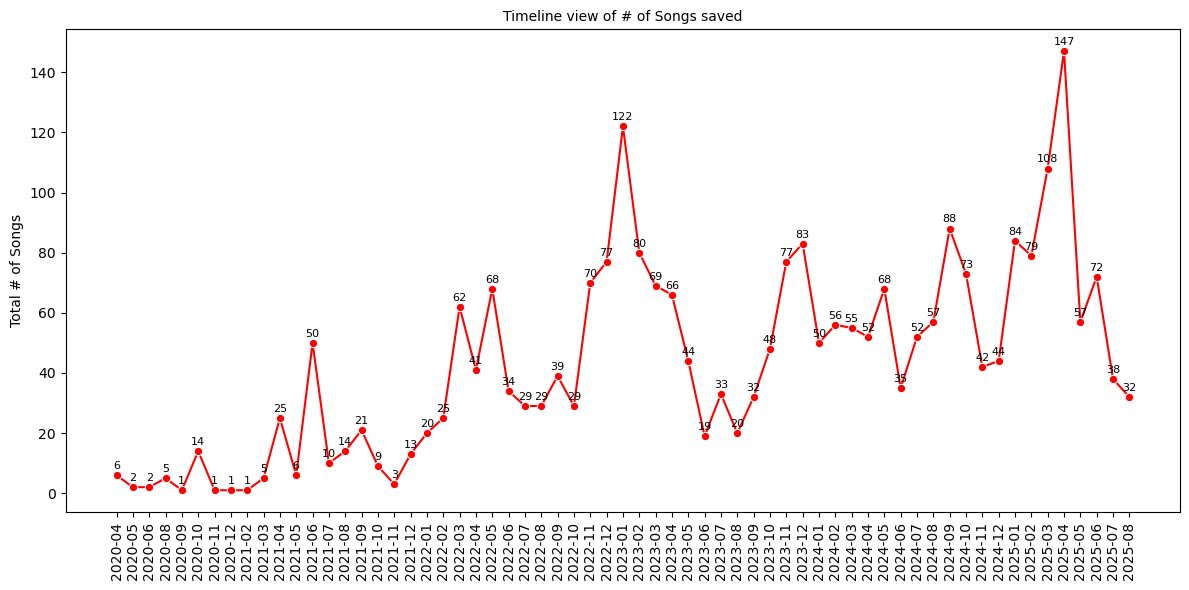

In [408]:
fig, ax1 = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(temp))  # positions for the bars


sns.lineplot(x= x_pos, y= temp['Song_count'], data= temp, ax=ax1, color='red', marker='o') # Or plt.plot()

ax1.set_ylabel('Total # of Songs', color='black', fontsize = 10)
ax1.tick_params(axis='y', labelcolor='black')
for i, value in enumerate(temp['Song_count']):
    if not np.isnan(value):
        ax1.annotate(f'{value}',
                     xy=(x_pos[i], value),
                     xytext=(0,3),
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=8, color='black')
        
ax1.set_xticks(x_pos)
ax1.set_xticklabels(temp.index, rotation=90)

plt.title('Timeline view of # of Songs saved', fontsize = 10)
fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [409]:
df.shape

(2694, 14)

# Joining Aritst Genres back to Final Dataframe "df"

In [410]:
temp = df_Artist.groupby('Artists')['Genre'].unique().reset_index()
temp.rename(columns={'Genre': 'Artist_Genres'}, inplace=True)
temp

,Artists,Artist_Genres
0,&ME,"[afro house, melodic house, house]"
1,2Pac,"[old school hip hop, gangster rap, west coast ..."
2,2facebleed,"[desi hip hop, hindi hip hop]"
3,3x3cute,[techno]
4,50 Cent,"[east coast hip hop, old school hip hop]"
...,...,...
824,deadmau5,"[edm, progressive house, dubstep]"
825,illich Mujica,[organic house]
826,prodbycpkshawn,[jersey club]
827,sunflwr,"[lo-fi house, jazz house]"


In [411]:
trial = trial.merge(temp, on='Artists', how='left')

In [412]:
df = df.merge(temp, on = 'Artists', how = 'left')

In [413]:
new_order = ['Song_Saved_Date_Year_Month','Song_Saved_Date_Year','Song_Saved_Date','Artist_Genres', 'Artists','Songs', 'Song_popularity', 'Artist_popularity', 'Artist_followers', 'Song_Popularity_Binary', 'Release_Date',  'Year_of_Release_Date', 'Year_Bins','Artist_id', 'Song_id']
df = df[new_order]

In [414]:
df.head()

,Song_Saved_Date_Year_Month,Song_Saved_Date_Year,Song_Saved_Date,Artist_Genres,Artists,Songs,Song_popularity,Artist_popularity,Artist_followers,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id
0,2025-08,2025,2025-08-16,[retro soul],Leon Bridges,Forgive You,51,77,1890552,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii
1,2025-08,2025,2025-08-16,[retro soul],Leon Bridges,Beyond,74,77,1890552,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0
2,2025-08,2025,2025-08-16,NaN,Eric Gabriel,Down the Line,29,22,1135,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a
3,2025-08,2025,2025-08-14,"[bhajan, devotional]",Krishna Das,Sita Ram,33,56,395688,Not Popular,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I
4,2025-08,2025,2025-08-13,NaN,Chuck Adams,Iris,54,48,28831,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK


## Miscellaneous Calculations

In [415]:
df[df['Song_Saved_Date_Year_Month'] == '2025-04']['Year_Bins'].value_counts().sort_index(ascending = True)

Year_Bins
1952 to 1976    22
1977 to 1999    39
2000 to 2010    23
2011 to 2019    20
2020 to 2025    43
Name: count, dtype: int64

In [416]:
df_Artist.groupby('Genre')['Artist_id'].count().sort_values(ascending = False)

Genre
bollywood      125
techno         116
hindi pop       99
desi            91
acid techno     64
              ... 
hyphy            1
idm              1
indie pop        1
indie r&b        1
zydeco           1
Name: Artist_id, Length: 286, dtype: int64

In [417]:
df.groupby('Artists')['Artist_id'].count().sort_values(ascending = False).head(20)

Artists
Deborah de Luca                 57
Pritam                          38
Kishore Kumar                   29
Lane 8                          28
Post Malone                     26
Shankar-Ehsaan-Loy              24
Charlotte de Witte              23
Worakls                         22
Udit Narayan                    22
Fleetwood Mac                   21
Sonu Nigam                      20
Vishal-Shekhar                  19
Ballarak                        18
Sukhwinder Singh                18
Creedence Clearwater Revival    17
Hozho                           17
Jagjit Singh                    16
Amit Trivedi                    15
A.R. Rahman                     15
Abhijeet                        14
Name: Artist_id, dtype: int64

In [418]:
df_Artist

,Artist_id,Artists,Genre,Artist_followers,Artist_popularity
0,3qnGvpP8Yth1AqSBMqON5x,Leon Bridges,retro soul,1890552,77
1,7BIXafmacnax46P30TEzNz,Krishna Das,bhajan,395688,56
2,7BIXafmacnax46P30TEzNz,Krishna Das,devotional,395688,56
3,0sSxphmGskGCKlwB9xa6WU,Himesh Reshammiya,bollywood,11789296,76
4,0sSxphmGskGCKlwB9xa6WU,Himesh Reshammiya,hindi pop,11789296,76
...,...,...,...,...,...
2099,5ChF3i92IPZHduM7jN3dpg,Nicky Romero,progressive house,2169663,65
2100,4AVFqumd2ogHFlRbKIjp1t,Alesso,edm,4026764,77
2101,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,pop,46457819,89
2102,6AUpl7JjUGpUCe7QVsEZzy,Saivite,devotional,8242,28


In [419]:
df_Artist.groupby('Genre')['Artist_popularity'].mean().sort_values(ascending = False).round(2)['techno']

41.48

In [420]:
df_Artist.groupby('Genre')['Artists'].unique()

Genre
3 step                                                          [Masšh]
acid rock                                    [The Doors, Grateful Dead]
acid techno           [Mha Iri, Ilija Djokovic, Patrik Berg, Lister,...
adult standards                          [Frank Sinatra, Roberta Flack]
afro house            [WhoMadeWho, Adam Port, Birds of Mind, Levi, &...
                                            ...                        
vocal jazz                [Frank Sinatra, Nina Simone, Louis Armstrong]
west coast hip hop    [E-40, 2Pac, The Pharcyde, Kendrick Lamar, Cyp...
worship                                                   [Alex Yurkiv]
yacht rock            [Fleetwood Mac, Firefall, Looking Glass, The D...
zydeco                                                    [King George]
Name: Artists, Length: 286, dtype: object

In [423]:
df.head()

,Song_Saved_Date_Year_Month,Song_Saved_Date_Year,Song_Saved_Date,Artist_Genres,Artists,Songs,Song_popularity,Artist_popularity,Artist_followers,Song_Popularity_Binary,Release_Date,Year_of_Release_Date,Year_Bins,Artist_id,Song_id
0,2025-08,2025,2025-08-16,[retro soul],Leon Bridges,Forgive You,51,77,1890552,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1sfTdlWfcFdI7NfmcfZPii
1,2025-08,2025,2025-08-16,[retro soul],Leon Bridges,Beyond,74,77,1890552,Popular,2018-05-04,2018,2011 to 2019,3qnGvpP8Yth1AqSBMqON5x,1Omt5bfz1tZUCqd26HxbS0
2,2025-08,2025,2025-08-16,NaN,Eric Gabriel,Down the Line,29,22,1135,Not Popular,2025-03-21,2025,2020 to 2025,0Mpu2CWzVWzHsKiVt9nPVx,1K3T9htc31JwKiZOd1zC5a
3,2025-08,2025,2025-08-14,"[bhajan, devotional]",Krishna Das,Sita Ram,33,56,395688,Not Popular,2005-10-04,2005,2000 to 2010,7BIXafmacnax46P30TEzNz,73ouTW48uzkEEZV1vyJC0I
4,2025-08,2025,2025-08-13,NaN,Chuck Adams,Iris,54,48,28831,Popular,2025-06-27,2025,2020 to 2025,6GLO5F72p0eTCcumR6Ac5a,4zQNPpLlINdDj3gOkBBRuK


In [426]:
df[df['Year_of_Release_Date']==2025].shape

(59, 15)

In [429]:
df[df['Artist_followers'] < 100000].shape

(629, 15)